# Dataset divided with ['Is Attack IP'] == True | ['Is Account Takeover'] == True | ['Login Successful'] == False

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

safe = pd.read_csv('divided-chunks/3096534_safe_dataset.csv', dtype={"Login Timestamp": object, "User ID": float, "IP Address": object, "Country": object, "ASN": float, "Browser Name and Version": object, "OS Name and Version": object, "Device Type": object, "Login Successfull": bool, "Is Attack IP": bool, "Is Account Takeover": bool})
susp = pd.read_csv('divided-chunks/suspicious_dataset_3m.csv', low_memory=False)

In [2]:
safe.info()
susp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Login Timestamp           object 
 1   User ID                   float64
 2   IP Address                object 
 3   Country                   object 
 4   ASN                       float64
 5   Browser Name and Version  object 
 6   OS Name and Version       object 
 7   Device Type               object 
 8   Login Successful          bool   
 9   Is Attack IP              bool   
 10  Is Account Takeover       bool   
dtypes: bool(3), float64(2), object(6)
memory usage: 191.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097043 entries, 0 to 3097042
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ASN                       float64
 1   Browser Name and Version  object 
 2   Country                   object 
 3   Devi

In [3]:
safe['Login Timestamp'] =  pd.to_datetime(safe['Login Timestamp'], infer_datetime_format=True)
susp['Login Timestamp'] =  pd.to_datetime(susp['Login Timestamp'], infer_datetime_format=True)
susp.dropna(axis = 0, how = 'all', inplace = True)
safe.dropna(axis = 0, how = 'all', inplace = True)

In [4]:
susp['IP Address'] = susp['IP Address'].apply(lambda x: str(x))
# susp["IP Address"] = susp["IP Address"].apply(lambda x: x.split("."))
safe['IP Address'] = safe['IP Address'].apply(lambda x: str(x))
# safe["IP Address"] = safe["IP Address"].apply(lambda x: x.split("."))

In [5]:
susp = susp.reset_index(drop=True)
safe = safe.reset_index(drop=True)

In [6]:
susp.info()
susp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097041 entries, 0 to 3097040
Data columns (total 11 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   ASN                       float64       
 1   Browser Name and Version  object        
 2   Country                   object        
 3   Device Type               object        
 4   IP Address                object        
 5   Is Account Takeover       object        
 6   Is Attack IP              object        
 7   Login Successful          object        
 8   Login Timestamp           datetime64[ns]
 9   OS Name and Version       object        
 10  User ID                   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 259.9+ MB


,ASN,Browser Name and Version,Country,Device Type,IP Address,Is Account Takeover,Is Attack IP,Login Successful,Login Timestamp,OS Name and Version,User ID
0,398986.0,Chrome Mobile WebView 85.0.4183,US,mobile,10.0.0.47,False,True,False,2020-02-03 12:43:59.396,Android 2.2,-4.618854e+18
1,393398.0,Chrome Mobile WebView 85.0.4183,US,mobile,209.236.123.126,False,True,False,2020-02-03 12:44:05.160,Android 4.1,-4.324476e+18
2,393398.0,Chrome Mobile 51.0.2704,US,mobile,38.135.39.102,False,True,False,2020-02-03 12:44:40.204,Android 4.1,9.133471e+18
3,393398.0,Chrome Mobile 84.0.4147,US,mobile,209.236.117.198,False,True,True,2020-02-03 12:45:13.655,Windows Phone 8.1,-3.522289e+18
4,266433.0,Chrome 69.0.3497.17.19,BR,desktop,170.82.7.240,False,True,False,2020-02-03 12:45:16.478,Mac OS X 10.14.6,-6.623218e+18


In [7]:
safe.info()
safe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 11 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Login Timestamp           datetime64[ns]
 1   User ID                   float64       
 2   IP Address                object        
 3   Country                   object        
 4   ASN                       float64       
 5   Browser Name and Version  object        
 6   OS Name and Version       object        
 7   Device Type               object        
 8   Login Successful          bool          
 9   Is Attack IP              bool          
 10  Is Account Takeover       bool          
dtypes: bool(3), datetime64[ns](1), float64(2), object(5)
memory usage: 191.7+ MB


,Login Timestamp,User ID,IP Address,Country,ASN,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,2020-05-07 15:44:17.514,4.082766e+18,92.220.144.172,NO,29695.0,Firefox 20.0.0.1604,iOS 13.4,mobile,True,False,False
1,2021-01-12 15:32:20.734,-3.387022e+18,170.39.78.9,US,393398.0,Iron 66.0.3450.1084,iOS 11.2.6,mobile,False,False,False
2,2020-03-17 09:08:19.990,-8.464135e+18,158.248.195.127,NO,29695.0,Chrome 73.0.3654,Mac OS X 10.14.6,desktop,True,False,False
3,2020-08-17 01:33:03.445,-4.324476e+18,8.39.144.119,AU,55256.0,Firefox Mobile 84.0,Android 4.1,mobile,False,False,False
4,2020-03-29 11:56:02.314,8.134007e+18,51.174.219.108,NO,29695.0,Firefox 20.0.0.1673,iOS 13.4,mobile,True,False,False


In [8]:
susp[susp.isna().any(axis=1)].count

<bound method DataFrame.count of               ASN Browser Name and Version Country Device Type  \
3331     137308.0          134 Browser 1.0      ID         NaN   
18071    137308.0          134 Browser 1.0      ID         NaN   
24814    137308.0          134 Browser 1.0      ID         NaN   
29269    137308.0          134 Browser 1.0      ID         NaN   
29848    393398.0          134 Browser 1.0      US         NaN   
...           ...                      ...     ...         ...   
3049346   24521.0          134 Browser 1.0      ID         NaN   
3054103  398986.0          134 Browser 1.0      US         NaN   
3058057  393398.0          134 Browser 1.0      US         NaN   
3072558   24521.0          134 Browser 1.0      ID         NaN   
3085431   24521.0          134 Browser 1.0      ID         NaN   

              IP Address Is Account Takeover Is Attack IP Login Successful  \
3331      103.108.187.47               False         True            False   
18071     103.108.

In [9]:
safe[safe.isna().any(axis=1)].count

<bound method DataFrame.count of                 Login Timestamp       User ID      IP Address Country  \
12062   2020-04-22 17:32:16.256 -4.324476e+18   170.39.78.117      US   
16945   2020-06-25 00:30:53.856 -4.324476e+18  23.137.225.204      US   
44975   2021-02-02 03:55:55.213 -4.324476e+18  185.112.224.98      DK   
45154   2020-12-06 10:33:56.092 -4.324476e+18   46.254.120.61      DE   
84621   2020-10-18 13:29:39.817 -4.324476e+18    170.39.77.11      US   
...                         ...           ...             ...     ...   
2946972 2020-07-01 16:27:41.949 -4.324476e+18     91.200.44.0      RU   
2956874 2020-03-18 15:01:40.283 -4.324476e+18    152.93.30.73      NO   
2965495 2020-07-01 17:45:49.284 -4.324476e+18    10.4.128.230      ID   
2968845 2020-05-16 21:55:14.176 -4.324476e+18      10.3.82.21      HU   
2994978 2020-07-09 01:02:45.421 -4.324476e+18    10.4.129.199      BE   

              ASN Browser Name and Version OS Name and Version Device Type  \
12062    393

In [10]:
searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
safe["Blacklisted"] = np.where(safe["Country"].str.contains('|'.join(searchfor)), True, False)
safe.head()

,Login Timestamp,User ID,IP Address,Country,ASN,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Blacklisted
0,2020-05-07 15:44:17.514,4.082766e+18,92.220.144.172,NO,29695.0,Firefox 20.0.0.1604,iOS 13.4,mobile,True,False,False,False
1,2021-01-12 15:32:20.734,-3.387022e+18,170.39.78.9,US,393398.0,Iron 66.0.3450.1084,iOS 11.2.6,mobile,False,False,False,True
2,2020-03-17 09:08:19.990,-8.464135e+18,158.248.195.127,NO,29695.0,Chrome 73.0.3654,Mac OS X 10.14.6,desktop,True,False,False,False
3,2020-08-17 01:33:03.445,-4.324476e+18,8.39.144.119,AU,55256.0,Firefox Mobile 84.0,Android 4.1,mobile,False,False,False,False
4,2020-03-29 11:56:02.314,8.134007e+18,51.174.219.108,NO,29695.0,Firefox 20.0.0.1673,iOS 13.4,mobile,True,False,False,False


In [11]:
susp["Blacklisted"] = np.where(susp["Country"].str.contains('|'.join(searchfor)), True, False)
susp.head()

,ASN,Browser Name and Version,Country,Device Type,IP Address,Is Account Takeover,Is Attack IP,Login Successful,Login Timestamp,OS Name and Version,User ID,Blacklisted
0,398986.0,Chrome Mobile WebView 85.0.4183,US,mobile,10.0.0.47,False,True,False,2020-02-03 12:43:59.396,Android 2.2,-4.618854e+18,True
1,393398.0,Chrome Mobile WebView 85.0.4183,US,mobile,209.236.123.126,False,True,False,2020-02-03 12:44:05.160,Android 4.1,-4.324476e+18,True
2,393398.0,Chrome Mobile 51.0.2704,US,mobile,38.135.39.102,False,True,False,2020-02-03 12:44:40.204,Android 4.1,9.133471e+18,True
3,393398.0,Chrome Mobile 84.0.4147,US,mobile,209.236.117.198,False,True,True,2020-02-03 12:45:13.655,Windows Phone 8.1,-3.522289e+18,True
4,266433.0,Chrome 69.0.3497.17.19,BR,desktop,170.82.7.240,False,True,False,2020-02-03 12:45:16.478,Mac OS X 10.14.6,-6.623218e+18,True


In [12]:
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
safe = safe.replace(cleanup_devices)
safe.head()

,Login Timestamp,User ID,IP Address,Country,ASN,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Blacklisted
0,2020-05-07 15:44:17.514,4.082766e+18,92.220.144.172,NO,29695.0,Firefox 20.0.0.1604,iOS 13.4,M,True,False,False,False
1,2021-01-12 15:32:20.734,-3.387022e+18,170.39.78.9,US,393398.0,Iron 66.0.3450.1084,iOS 11.2.6,M,False,False,False,True
2,2020-03-17 09:08:19.990,-8.464135e+18,158.248.195.127,NO,29695.0,Chrome 73.0.3654,Mac OS X 10.14.6,D,True,False,False,False
3,2020-08-17 01:33:03.445,-4.324476e+18,8.39.144.119,AU,55256.0,Firefox Mobile 84.0,Android 4.1,M,False,False,False,False
4,2020-03-29 11:56:02.314,8.134007e+18,51.174.219.108,NO,29695.0,Firefox 20.0.0.1673,iOS 13.4,M,True,False,False,False


In [13]:
susp = susp.replace(cleanup_devices)
susp.head()

,ASN,Browser Name and Version,Country,Device Type,IP Address,Is Account Takeover,Is Attack IP,Login Successful,Login Timestamp,OS Name and Version,User ID,Blacklisted
0,398986.0,Chrome Mobile WebView 85.0.4183,US,M,10.0.0.47,False,True,False,2020-02-03 12:43:59.396,Android 2.2,-4.618854e+18,True
1,393398.0,Chrome Mobile WebView 85.0.4183,US,M,209.236.123.126,False,True,False,2020-02-03 12:44:05.160,Android 4.1,-4.324476e+18,True
2,393398.0,Chrome Mobile 51.0.2704,US,M,38.135.39.102,False,True,False,2020-02-03 12:44:40.204,Android 4.1,9.133471e+18,True
3,393398.0,Chrome Mobile 84.0.4147,US,M,209.236.117.198,False,True,True,2020-02-03 12:45:13.655,Windows Phone 8.1,-3.522289e+18,True
4,266433.0,Chrome 69.0.3497.17.19,BR,D,170.82.7.240,False,True,False,2020-02-03 12:45:16.478,Mac OS X 10.14.6,-6.623218e+18,True


In [14]:
safe["Browser Type"] = (np.where(safe["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(safe["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
safe = safe.replace(cleanup_browser)
safe.head()

,Login Timestamp,User ID,IP Address,Country,ASN,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Blacklisted,Browser Type
0,2020-05-07 15:44:17.514,4.082766e+18,92.220.144.172,NO,29695.0,Firefox 20.0.0.1604,iOS 13.4,M,True,False,False,False,F
1,2021-01-12 15:32:20.734,-3.387022e+18,170.39.78.9,US,393398.0,Iron 66.0.3450.1084,iOS 11.2.6,M,False,False,False,True,O
2,2020-03-17 09:08:19.990,-8.464135e+18,158.248.195.127,NO,29695.0,Chrome 73.0.3654,Mac OS X 10.14.6,D,True,False,False,False,C
3,2020-08-17 01:33:03.445,-4.324476e+18,8.39.144.119,AU,55256.0,Firefox Mobile 84.0,Android 4.1,M,False,False,False,False,F
4,2020-03-29 11:56:02.314,8.134007e+18,51.174.219.108,NO,29695.0,Firefox 20.0.0.1673,iOS 13.4,M,True,False,False,False,F


In [15]:
susp["Browser Type"] = (np.where(susp["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(susp["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
susp = susp.replace(cleanup_browser)
susp.tail()

,ASN,Browser Name and Version,Country,Device Type,IP Address,Is Account Takeover,Is Attack IP,Login Successful,Login Timestamp,OS Name and Version,User ID,Blacklisted,Browser Type
3097036,500035.0,Linkbot 1.0,ID,B,10.0.37.160,False,True,False,2021-02-28 23:57:00.409,Other,-4.324476e+18,True,O
3097037,208653.0,Chrome Mobile 81.0.4044.1947,DE,M,5.183.138.218,False,True,False,2021-02-28 23:57:20.002,Android 4.1,-4.324476e+18,False,C
3097038,22612.0,Chrome 72.0.3626.116,ID,D,199.188.207.122,False,True,False,2021-02-28 23:58:04.017,Mac OS X 10.14.6,-4.324476e+18,True,C
3097039,393398.0,Chrome Mobile 81.0.4044.1933,US,M,209.236.125.108,False,True,False,2021-02-28 23:58:44.011,iOS 13.4,-4.324476e+18,True,C
3097040,197175.0,Chrome Mobile WebView 43.0.2357,CA,M,10.0.16.204,False,True,False,2021-02-28 23:59:22.608,iOS 12.4.6,-4.324476e+18,False,C


In [16]:
safe.to_csv('new_modified_safe_dataset.csv', encoding='utf-8', index=False)
susp.to_csv('new_modified_susp_dataset.csv', encoding='utf-8', index=False)

**Preparing dataset is done.**

### ATO 10/200

In [17]:
# random sample for ML part with 10/200 ato
s = susp.loc[susp['Is Account Takeover'] == True]
df = pd.concat([susp.tail(100), safe.head(90), s.head(10)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

In [18]:
df.to_csv('new_modified_sample_dataset200.csv', encoding='utf-8', index=False)

In [19]:
df1 = df.copy()
df1.drop("OS Name and Version", inplace=True, axis=1)
df1.drop("Browser Name and Version", inplace=True, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ASN                  200 non-null    float64       
 1   Country              200 non-null    object        
 2   Device Type          200 non-null    object        
 3   IP Address           200 non-null    object        
 4   Is Account Takeover  200 non-null    object        
 5   Is Attack IP         200 non-null    object        
 6   Login Successful     200 non-null    object        
 7   Login Timestamp      200 non-null    datetime64[ns]
 8   User ID              200 non-null    float64       
 9   Blacklisted          200 non-null    bool          
 10  Browser Type         200 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(7)
memory usage: 15.9+ KB


In [20]:
df1.isnull().sum().sum()

0

In [21]:
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  200 non-null    float64 
 1   Country              200 non-null    category
 2   Device Type          200 non-null    category
 3   IP Address           200 non-null    category
 4   Is Account Takeover  200 non-null    bool    
 5   Is Attack IP         200 non-null    bool    
 6   Login Successful     200 non-null    bool    
 7   Login Timestamp      200 non-null    category
 8   User ID              200 non-null    float64 
 9   Blacklisted          200 non-null    bool    
 10  Browser Type         200 non-null    category
dtypes: bool(4), category(5), float64(2)
memory usage: 22.0 KB


In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


## XGB Classifier - EXPERIMENTAL
##### https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  200 non-null    float64 
 1   Country              200 non-null    category
 2   Device Type          200 non-null    category
 3   IP Address           200 non-null    category
 4   Is Attack IP         200 non-null    bool    
 5   Login Successful     200 non-null    bool    
 6   Login Timestamp      200 non-null    category
 7   User ID              200 non-null    float64 
 8   Blacklisted          200 non-null    bool    
 9   Browser Type         200 non-null    category
 10  Is Account Takeover  200 non-null    bool    
dtypes: bool(4), category(5), float64(2)
memory usage: 22.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------     

array([0.04656677, 0.4416981 , 0.02399971, 0.01092903, 0.08391444,
       0.11133045, 0.21102063, 0.01387566, 0.05666523, 0.        ],
      dtype=float32)

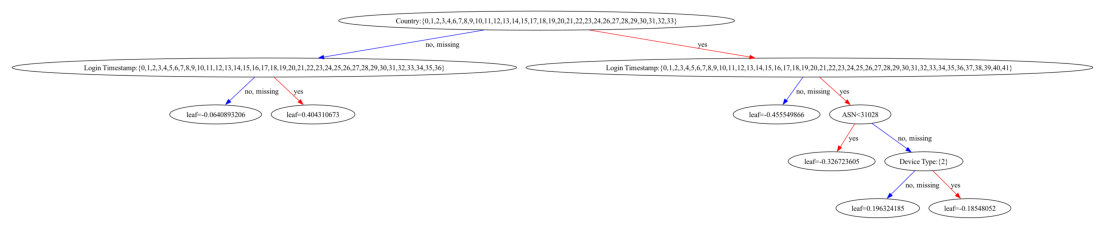

In [125]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]
X.info()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model.json")
# #eval results
# clf.evals_result_
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("./caterogical-model-graph.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
clf.feature_importances_

In [25]:
print(clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


### ENCODING CATEGORICAL VALUES -> Label Encoding

In [114]:
df2 = df1.copy()
# df2.drop("OS Name and Version", inplace=True, axis=1)
# df2.drop("Browser Name and Version", inplace=True, axis=1)
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  200 non-null    float64
 1   Country              200 non-null    int8   
 2   Device Type          200 non-null    int8   
 3   IP Address           200 non-null    int16  
 4   Is Account Takeover  200 non-null    bool   
 5   Is Attack IP         200 non-null    bool   
 6   Login Successful     200 non-null    bool   
 7   Login Timestamp      200 non-null    int16  
 8   User ID              200 non-null    float64
 9   Blacklisted          200 non-null    bool   
 10  Browser Type         200 non-null    int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 5.4 KB


,ASN,Country,Device Type,IP Address,Is Account Takeover,Is Attack IP,Login Successful,Login Timestamp,User ID,Blacklisted,Browser Type
0,393398.0,28,2,117,False,True,False,176,-9.389991e+17,True,0
1,208653.0,9,2,124,False,True,False,189,-4.324476e+18,False,0
2,29695.0,21,2,136,False,False,False,61,4.513092e+18,False,2
3,262582.0,7,1,9,False,False,False,32,-4.324476e+18,False,0
4,208653.0,9,2,124,False,True,False,196,-4.324476e+18,False,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  200 non-null    float64
 1   Country              200 non-null    int8   
 2   Device Type          200 non-null    int8   
 3   IP Address           200 non-null    int16  
 4   Is Attack IP         200 non-null    bool   
 5   Login Successful     200 non-null    bool   
 6   Login Timestamp      200 non-null    int16  
 7   User ID              200 non-null    float64
 8   Blacklisted          200 non-null    bool   
 9   Browser Type         200 non-null    int8   
 10  Is Account Takeover  200 non-null    bool   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 5.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            ---

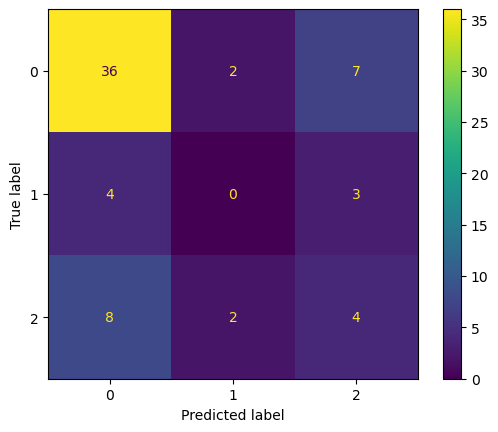

In [28]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
# tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
# print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 160
The number of records in the test dataset is 40
The training dataset has 135 records for the majority class and 25 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        35
        True       0.12      1.00      0.22         5

    accuracy                           0.12        40
   macro avg       0.06      0.50      0.11        40
weighted avg       0.02      0.12      0.03        40

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.88      1.00      0.93        35
        True       0.00      0.00      0.00         5

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40

[[ 0 35]
 [ 0  5]]


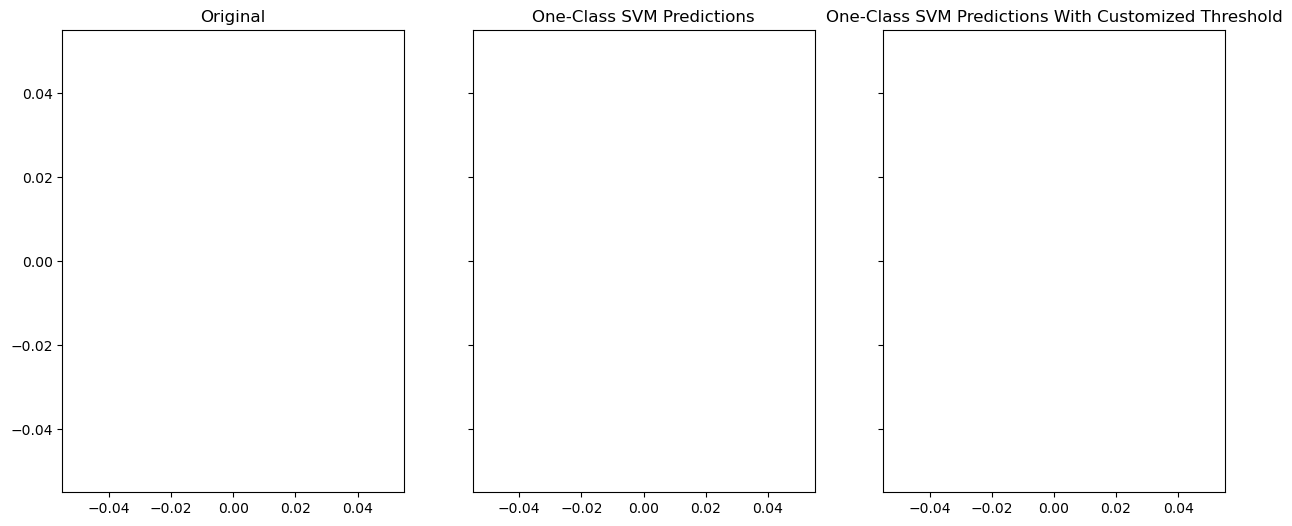

In [127]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Convert the data from numpy array to a pandas dataframe
# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [128]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
df.info()
anomaly_inputs = ['Browser Type', 'Login Timestamp', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Browser Type', 'Login Timestamp','anomaly_scores','anomaly', 'Is Account Takeover'] ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  200 non-null    float64
 1   Country              200 non-null    int8   
 2   Device Type          200 non-null    int8   
 3   IP Address           200 non-null    int16  
 4   Is Account Takeover  200 non-null    bool   
 5   Is Attack IP         200 non-null    bool   
 6   Login Successful     200 non-null    bool   
 7   Login Timestamp      200 non-null    int16  
 8   User ID              200 non-null    float64
 9   Blacklisted          200 non-null    bool   
 10  Browser Type         200 non-null    int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 5.4 KB


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Browser Type,Login Timestamp,anomaly_scores,anomaly,Is Account Takeover
0,0,52,0.141573,1,False
1,0,136,0.155021,1,False
2,2,56,0.005451,1,False
3,0,1,0.006160,1,True
4,0,118,0.146596,1,False
...,...,...,...,...,...
195,0,114,0.149021,1,False
196,0,183,0.120525,1,False
197,0,172,0.132445,1,False
198,0,29,0.068544,1,False


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


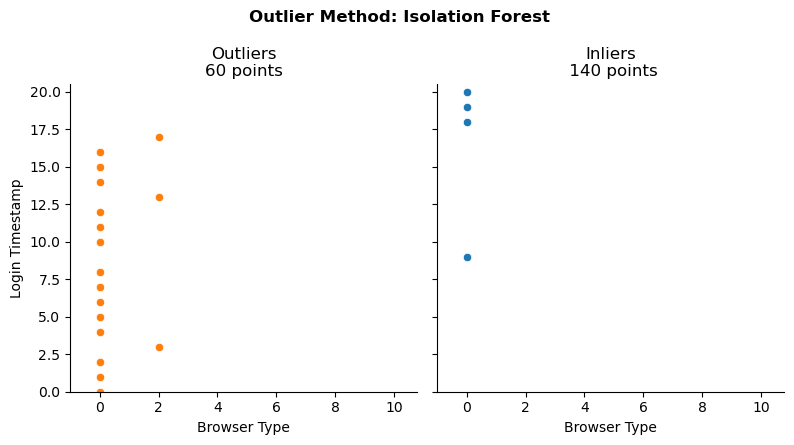

In [131]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

outlier_plot(df, 'Isolation Forest', 'Browser Type', 'Login Timestamp', [-1, 10.8], [0, 20.5]);

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


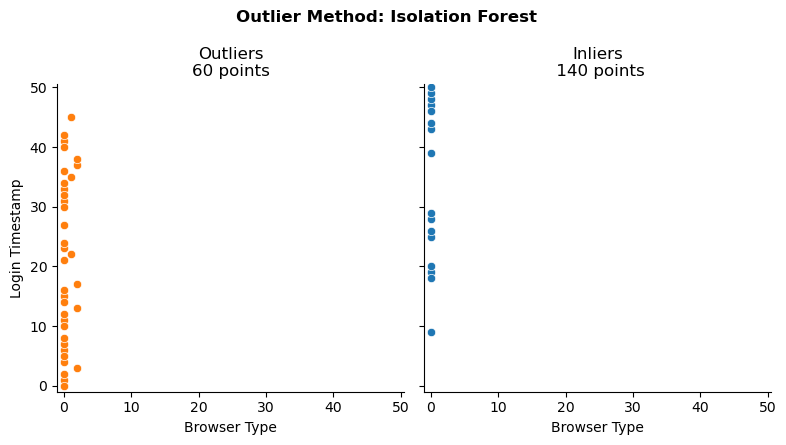

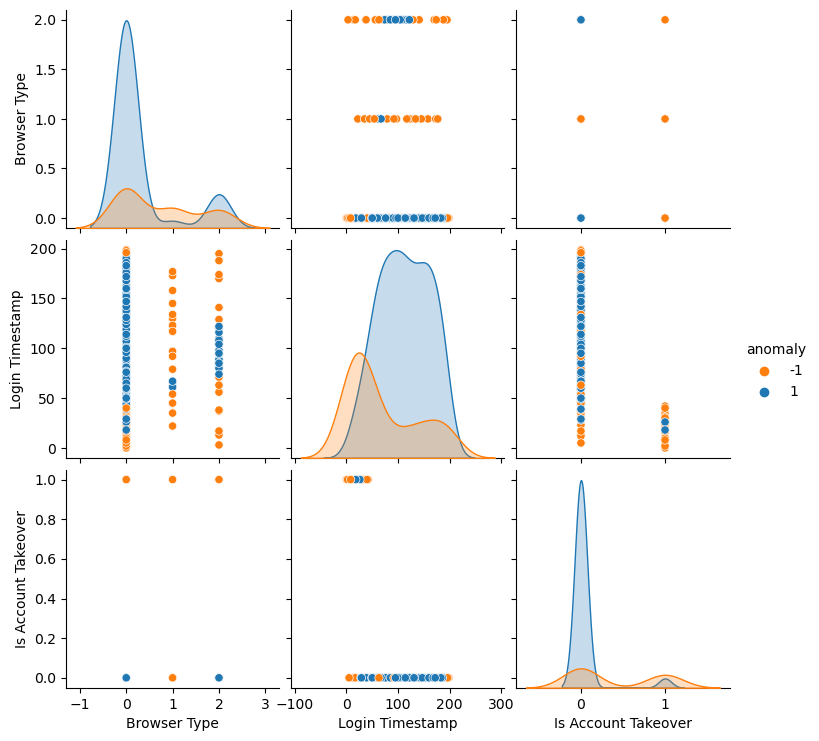

In [133]:
# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Browser Type', 'Login Timestamp', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [157]:
df = df3.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Is Attack IP,Blacklisted,anomaly_scores,anomaly,Is Account Takeover
0,False,False,0.113536,1,False
1,True,True,0.076295,1,False
2,False,False,0.113536,1,False
3,False,False,-0.024858,-1,True
4,False,True,0.088005,1,False
...,...,...,...,...,...
195,False,True,0.088005,1,False
196,True,True,0.076295,1,False
197,True,True,0.076295,1,False
198,False,True,0.088005,1,False


Outlier Method: Isolation Forest
Number of anomalous values 14
Number of non anomalous values  186
Total Number of Values: 200


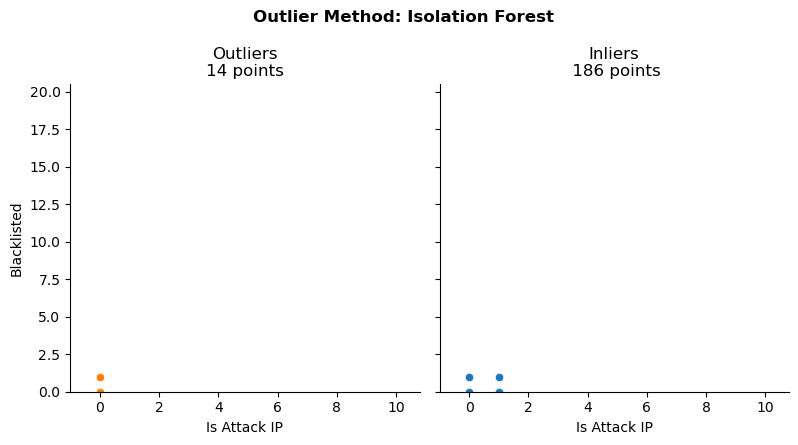

In [146]:
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 10.8], [0, 20.5]);

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 58
Number of non anomalous values  142
Total Number of Values: 200


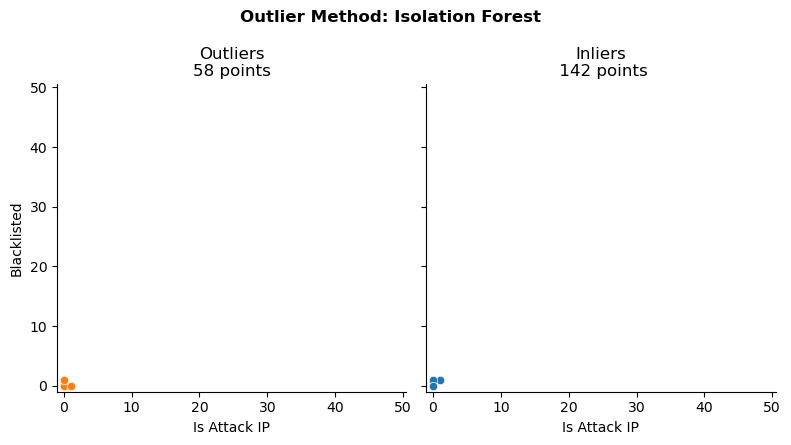

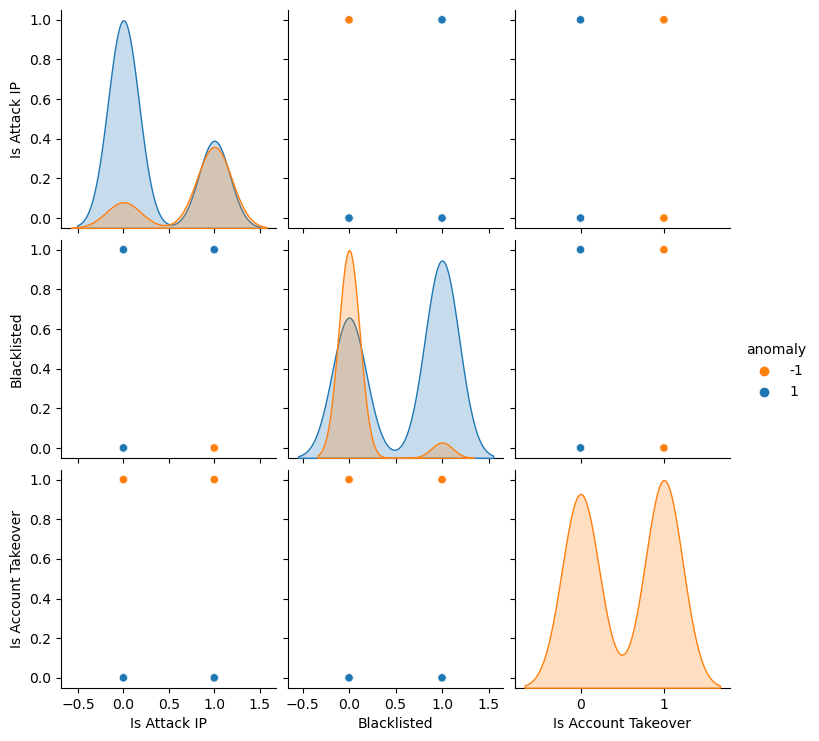

In [147]:
# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

Text(0, 0.5, 'Frequency')

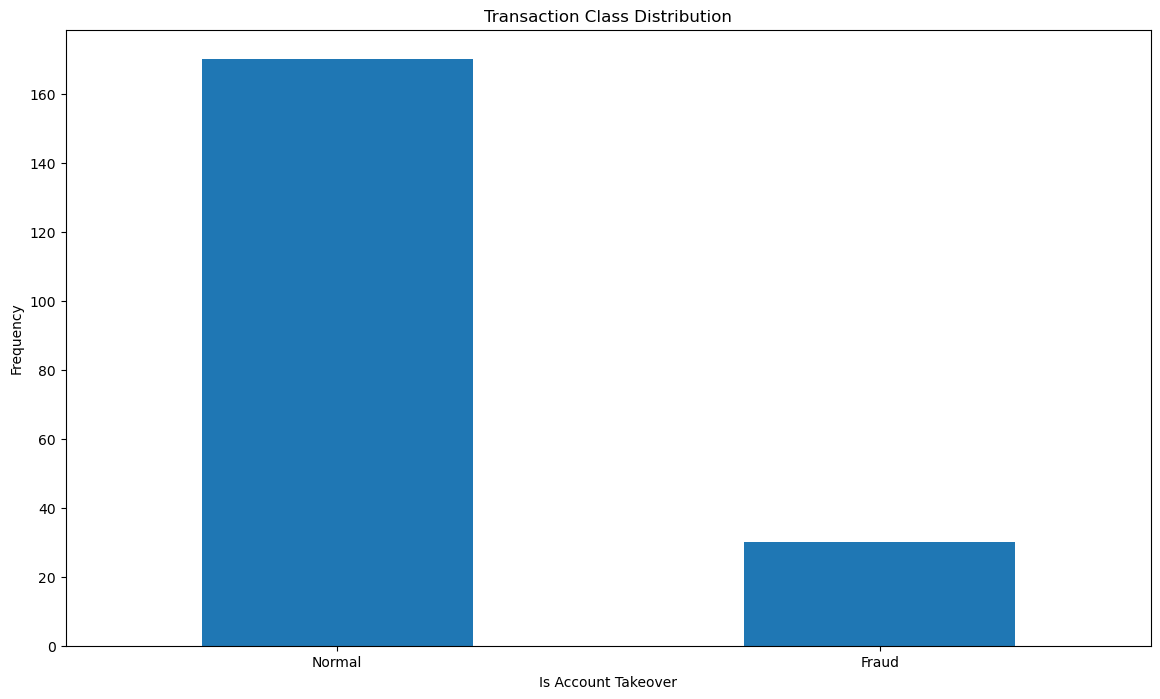

In [134]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

In [135]:
fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

(30, 11) (170, 11)


In [136]:
outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

(200, 10)
(200,)
Isolation Forest: 52
Accuracy Score :
0.74
Classification Report :
              precision    recall  f1-score   support

       False       0.86      0.83      0.84       170
        True       0.19      0.23      0.21        30

    accuracy                           0.74       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.76      0.74      0.75       200

Local Outlier Factor: 52
Accuracy Score :
0.74
Classification Report :
              precision    recall  f1-score   support

       False       0.86      0.83      0.84       170
        True       0.19      0.23      0.21        30

    accuracy                           0.74       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.76      0.74      0.75       200

Support Vector Machine: 150
Accuracy Score :
0.25
Classification Report :
              precision    recall  f1-score   support

       False       0.71      0.20      0.31       170
        

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [148]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 419 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(413)
memory usage: 84.7 KB


,ASN,Is Account Takeover,Is Attack IP,Login Successful,User ID,Blacklisted,cntr_AM,cntr_AR,cntr_AU,cntr_BA,...,lgnt_2021-02-28 23:56:23.148,lgnt_2021-02-28 23:56:44.382,lgnt_2021-02-28 23:57:00.409,lgnt_2021-02-28 23:57:20.002,lgnt_2021-02-28 23:58:04.017,lgnt_2021-02-28 23:58:44.011,lgnt_2021-02-28 23:59:22.608,brw_C,brw_F,brw_O
0,29695.0,False,False,True,4.984093e+18,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,393398.0,False,True,False,-4.324476e+18,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,36218.0,False,False,False,-4.324476e+18,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,503109.0,True,False,True,-7.654600e+18,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,393398.0,False,False,False,-4.324476e+18,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 419 entries, ASN to Is Account Takeover
dtypes: bool(4), float64(2), uint8(413)
memory usage: 84.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 418 entries, ASN to brw_O
dtypes: bool(3), float64(2), uint8(413)
memory usage: 84.5 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_est

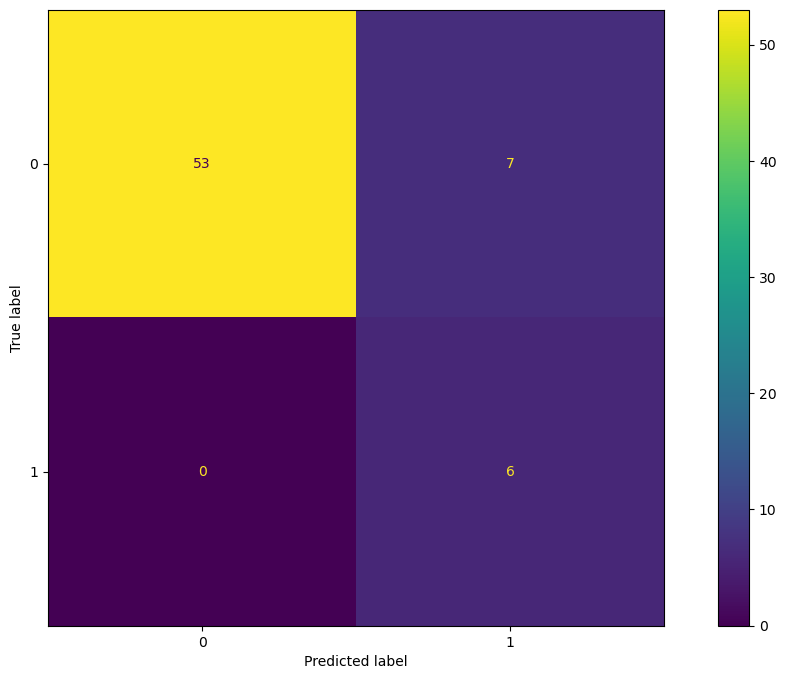

In [149]:
# XGBoost 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:418]
Y = dataset.iloc[:,418]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 160
The number of records in the test dataset is 40
The training dataset has 135 records for the majority class and 25 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.03      0.06        35
        True       0.13      1.00      0.23         5

    accuracy                           0.15        40
   macro avg       0.56      0.51      0.14        40
weighted avg       0.89      0.15      0.08        40

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.88      1.00      0.93        35
        True       0.00      0.00      0.00         5

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40

[[ 1 34]
 [ 0  5]]


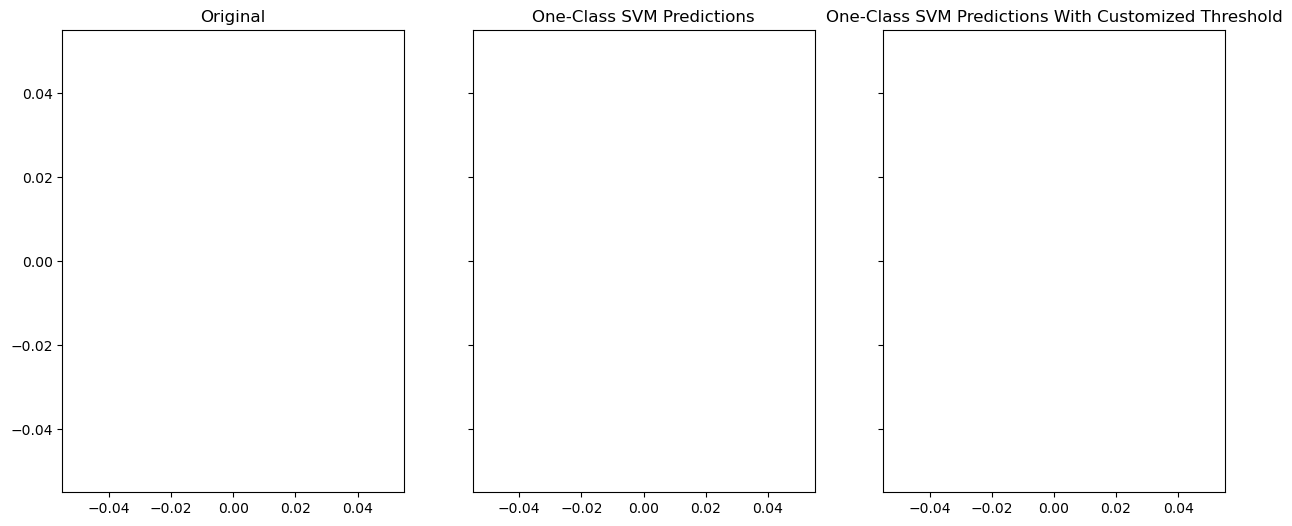

In [141]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:418]
Y = dataset.iloc[:,418]

# Convert the data from numpy array to a pandas dataframe
# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [142]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
df.info()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 419 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(413)
memory usage: 84.7 KB


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Is Attack IP,Blacklisted,anomaly_scores,anomaly,Is Account Takeover
0,False,False,0.113536,1,False
1,True,True,0.076295,1,False
2,False,False,0.113536,1,False
3,False,False,-0.024858,-1,True
4,False,True,0.088005,1,False
...,...,...,...,...,...
195,False,True,0.088005,1,False
196,True,True,0.076295,1,False
197,True,True,0.076295,1,False
198,False,True,0.088005,1,False


Outlier Method: Isolation Forest
Number of anomalous values 14
Number of non anomalous values  186
Total Number of Values: 200


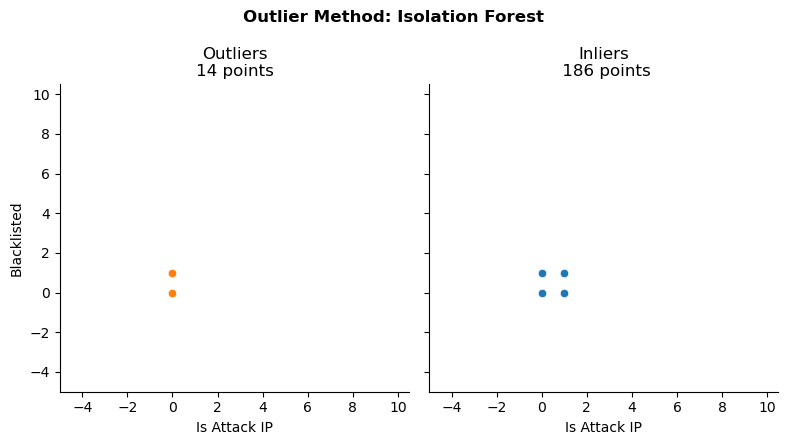

In [143]:
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-5, 10.5], [-5, 10.5]);

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 58
Number of non anomalous values  142
Total Number of Values: 200


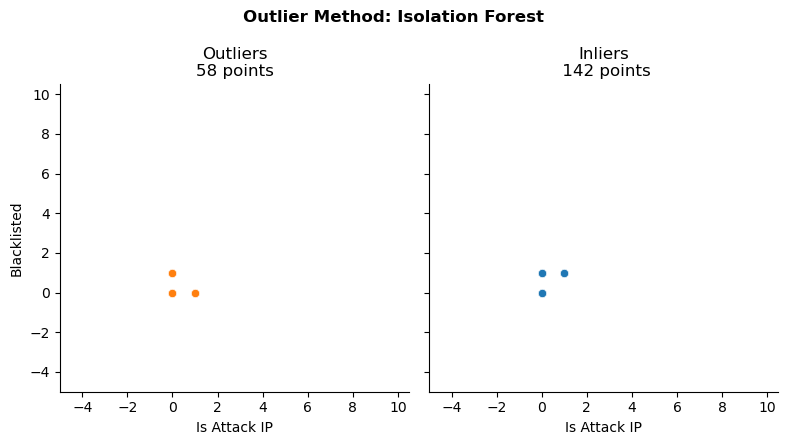

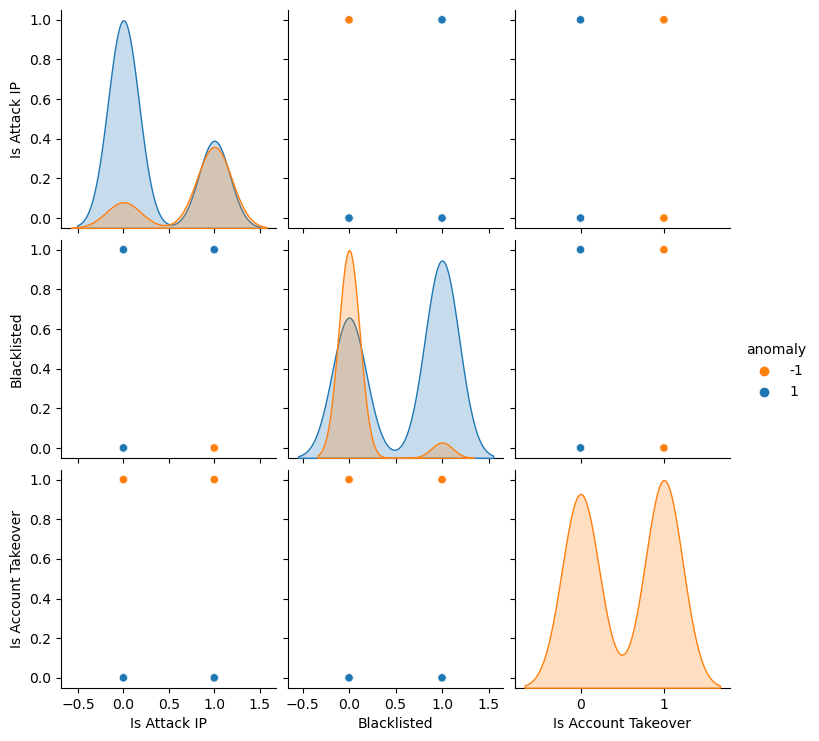

In [144]:
# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-5, 10.5], [-5, 10.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [152]:
df = df3.copy()
anomaly_inputs = ['Login Successful', 'User ID', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'User ID','anomaly_scores','anomaly', 'Is Account Takeover'] ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 419 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(413)
memory usage: 84.7 KB


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Login Successful,User ID,anomaly_scores,anomaly,Is Account Takeover
0,True,4.984093e+18,0.126875,1,False
1,False,-4.324476e+18,0.259830,1,False
2,False,-4.324476e+18,0.259830,1,False
3,True,-7.654600e+18,-0.002079,-1,True
4,False,-4.324476e+18,0.259830,1,False
...,...,...,...,...,...
195,True,-8.054079e+18,0.031393,1,False
196,False,-4.324476e+18,0.259830,1,False
197,False,-4.324476e+18,0.259830,1,False
198,True,5.374074e+18,0.120611,1,False


Outlier Method: Isolation Forest
Number of anomalous values 20
Number of non anomalous values  180
Total Number of Values: 200


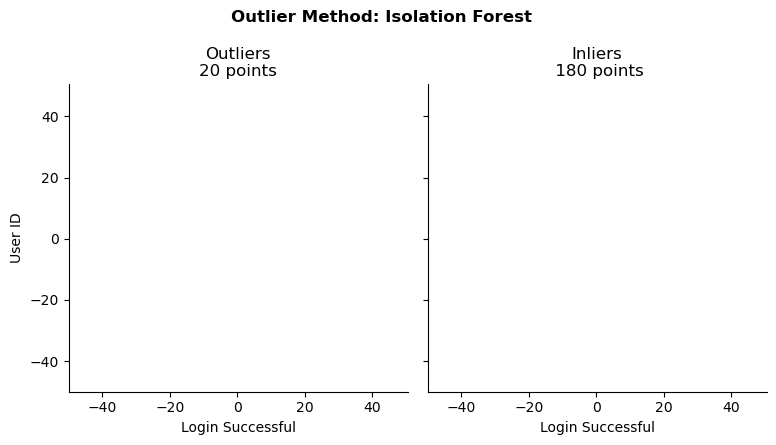

In [154]:
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-50, 50.5], [-50, 50.5]);

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


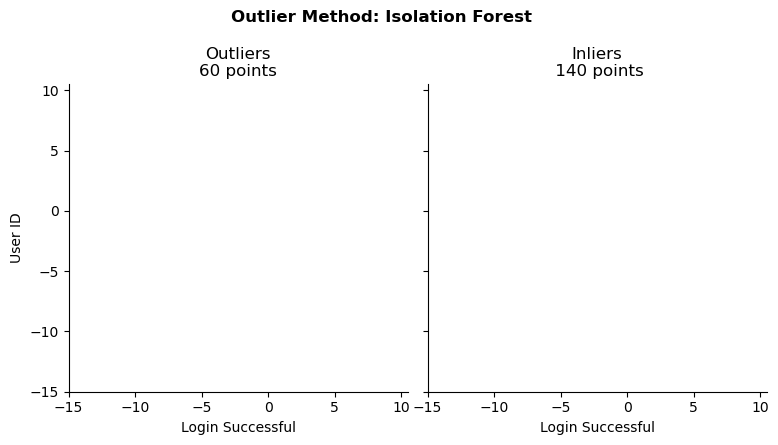

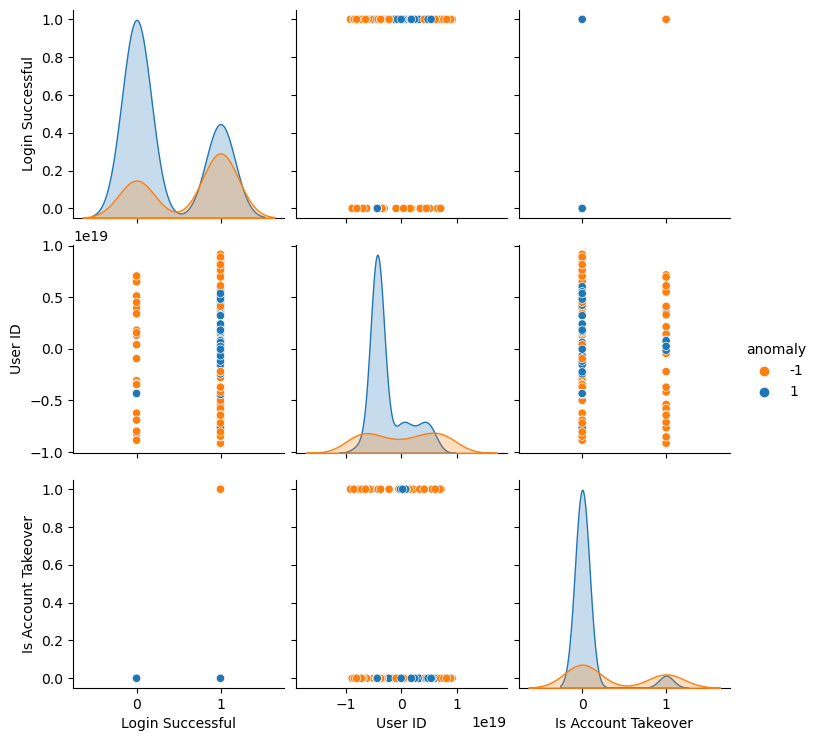

In [156]:
# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-15, 10.5], [-15, 10.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

Text(0, 0.5, 'Frequency')

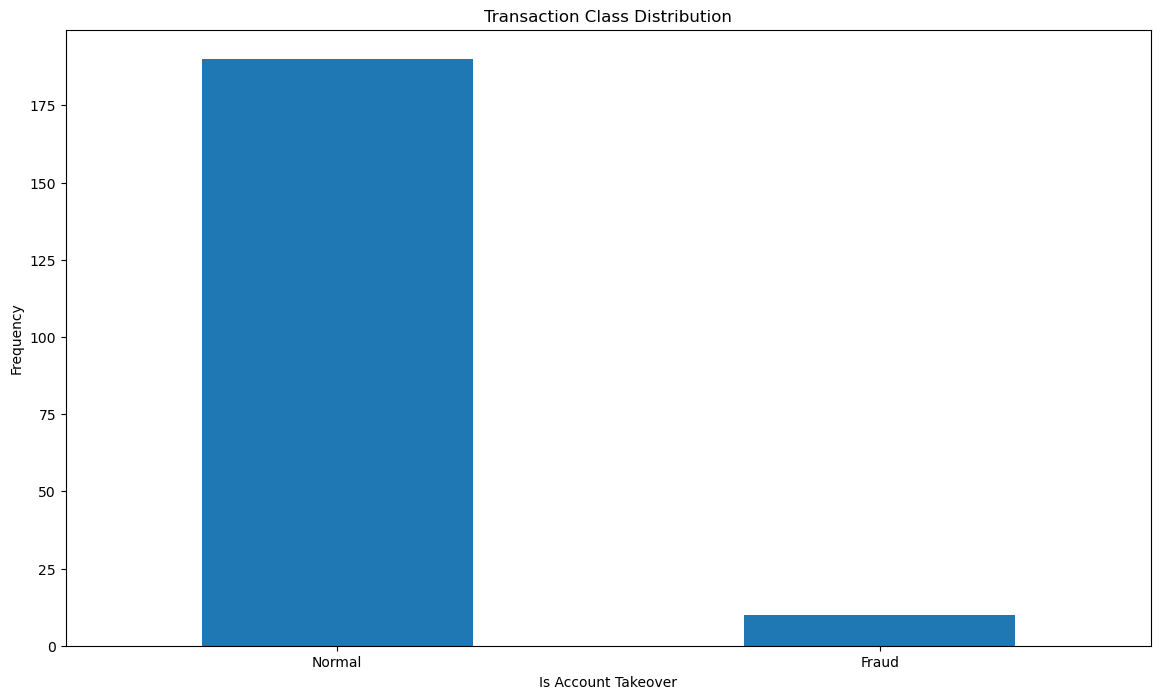

In [117]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

In [118]:
fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

(10, 402) (190, 402)


In [119]:
outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

(200, 401)
(200,)
Isolation Forest: 21
Accuracy Score :
0.895
Classification Report :
              precision    recall  f1-score   support

       False       0.95      0.94      0.94       190
        True       0.00      0.00      0.00        10

    accuracy                           0.90       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.90      0.90      0.90       200

Local Outlier Factor: 17
Accuracy Score :
0.915
Classification Report :
              precision    recall  f1-score   support

       False       0.96      0.95      0.96       190
        True       0.18      0.20      0.19        10

    accuracy                           0.92       200
   macro avg       0.57      0.58      0.57       200
weighted avg       0.92      0.92      0.92       200

Support Vector Machine: 156
Accuracy Score :
0.22
Classification Report :
              precision    recall  f1-score   support

       False       0.85      0.22      0.34       190
     

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## 30 takeover out of 200 rows

In [166]:
s = susp.loc[susp['Is Account Takeover'] == True]
df = pd.concat([susp.tail(70), safe.head(100), s.head(30)], ignore_index=True, sort=False)

# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)
df.drop("OS Name and Version", inplace=True, axis=1)
df.drop("Browser Name and Version", inplace=True, axis=1)

df1 = df.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  200 non-null    float64 
 1   Country              200 non-null    category
 2   Device Type          200 non-null    category
 3   IP Address           200 non-null    category
 4   Is Account Takeover  200 non-null    bool    
 5   Is Attack IP         200 non-null    bool    
 6   Login Successful     200 non-null    bool    
 7   Login Timestamp      200 non-null    category
 8   User ID              200 non-null    float64 
 9   Blacklisted          200 non-null    bool    
 10  Browser Type         200 non-null    category
dtypes: bool(4), category(5), float64(2)
memory usage: 22.1 KB


# Experimental xgboost (https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ASN                  200 non-null    float64 
 1   Country              200 non-null    category
 2   Device Type          200 non-null    category
 3   IP Address           200 non-null    category
 4   Is Attack IP         200 non-null    bool    
 5   Login Successful     200 non-null    bool    
 6   Login Timestamp      200 non-null    category
 7   User ID              200 non-null    float64 
 8   Blacklisted          200 non-null    bool    
 9   Browser Type         200 non-null    category
 10  Is Account Takeover  200 non-null    bool    
dtypes: bool(4), category(5), float64(2)
memory usage: 22.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------     

array([0.04656677, 0.4416981 , 0.02399971, 0.01092903, 0.08391444,
       0.11133045, 0.21102063, 0.01387566, 0.05666523, 0.        ],
      dtype=float32)

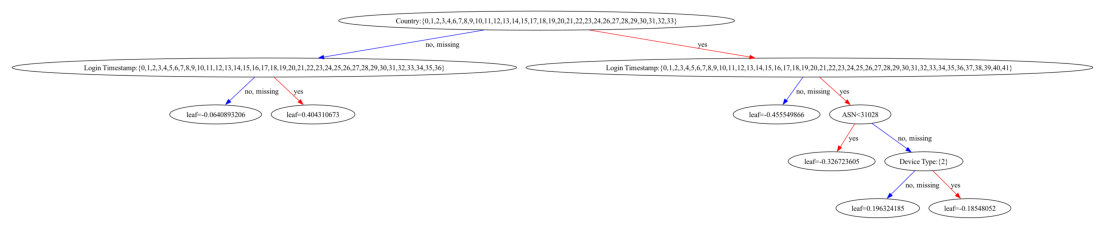

In [159]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
clf.feature_importances_

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [168]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  200 non-null    float64
 1   Country              200 non-null    int8   
 2   Device Type          200 non-null    int8   
 3   IP Address           200 non-null    int16  
 4   Is Account Takeover  200 non-null    bool   
 5   Is Attack IP         200 non-null    bool   
 6   Login Successful     200 non-null    bool   
 7   Login Timestamp      200 non-null    int16  
 8   User ID              200 non-null    float64
 9   Blacklisted          200 non-null    bool   
 10  Browser Type         200 non-null    int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 5.4 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  200 non-null    float64
 1   Country              200 non-null    int8   
 2   Device Type          200 non-null    int8   
 3   IP Address           200 non-null    int16  
 4   Is Attack IP         200 non-null    bool   
 5   Login Successful     200 non-null    bool   
 6   Login Timestamp      200 non-null    int16  
 7   User ID              200 non-null    float64
 8   Blacklisted          200 non-null    bool   
 9   Browser Type         200 non-null    int8   
 10  Is Account Takeover  200 non-null    bool   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 5.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --

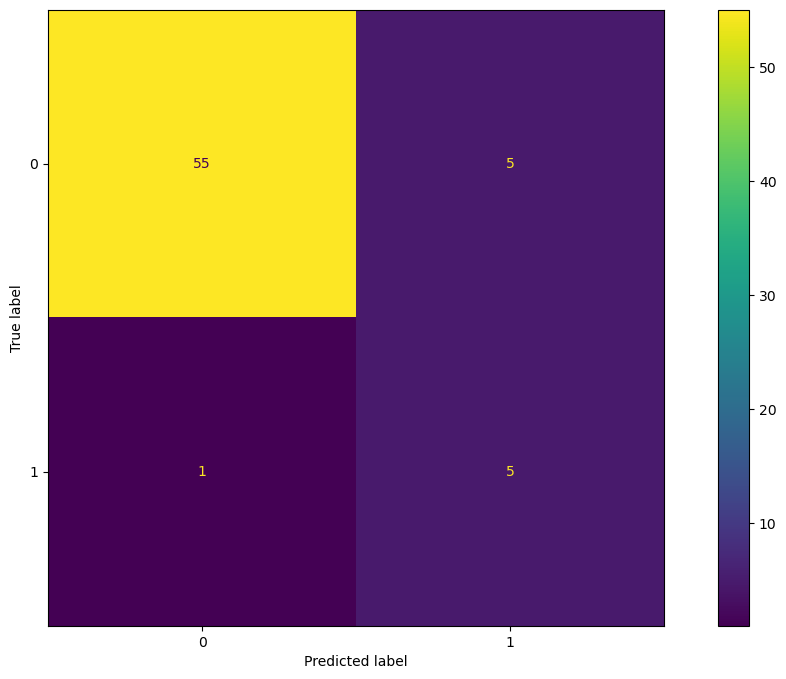

In [161]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 160
The number of records in the test dataset is 40
The training dataset has 137 records for the majority class and 23 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        33
        True       0.17      1.00      0.30         7

    accuracy                           0.17        40
   macro avg       0.09      0.50      0.15        40
weighted avg       0.03      0.17      0.05        40

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.82      1.00      0.90        33
        True       0.00      0.00      0.00         7

    accuracy                           0.82        40
   macro avg       0.41      0.50      0.45        40
weighted avg       0.68      0.82      0.75        40

[[ 0 33]
 [ 0  7]]


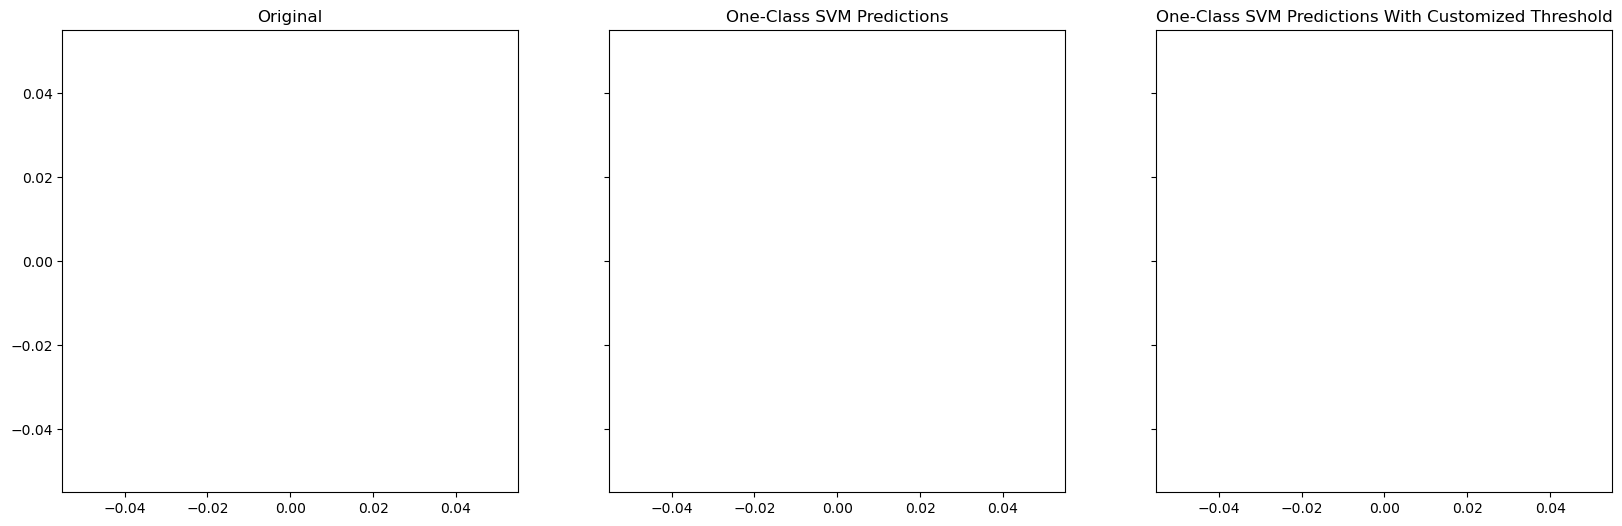

In [162]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Convert the data from numpy array to a pandas dataframe
# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  200 non-null    float64
 1   Country              200 non-null    int8   
 2   Device Type          200 non-null    int8   
 3   IP Address           200 non-null    int16  
 4   Is Account Takeover  200 non-null    bool   
 5   Is Attack IP         200 non-null    bool   
 6   Login Successful     200 non-null    bool   
 7   Login Timestamp      200 non-null    int16  
 8   User ID              200 non-null    float64
 9   Blacklisted          200 non-null    bool   
 10  Browser Type         200 non-null    int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 5.4 KB
Outlier Method: Isolation Forest
Number of anomalous values 14
Number of non anomalous values  186
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 58
Number of non anomalous values  142
Total Number of Values: 200


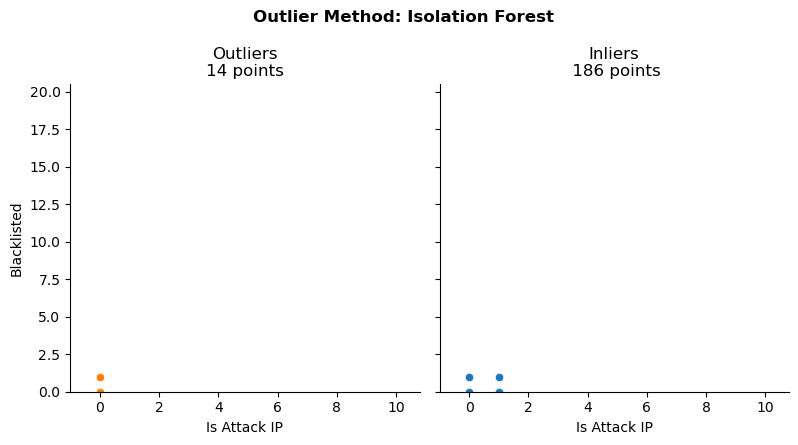

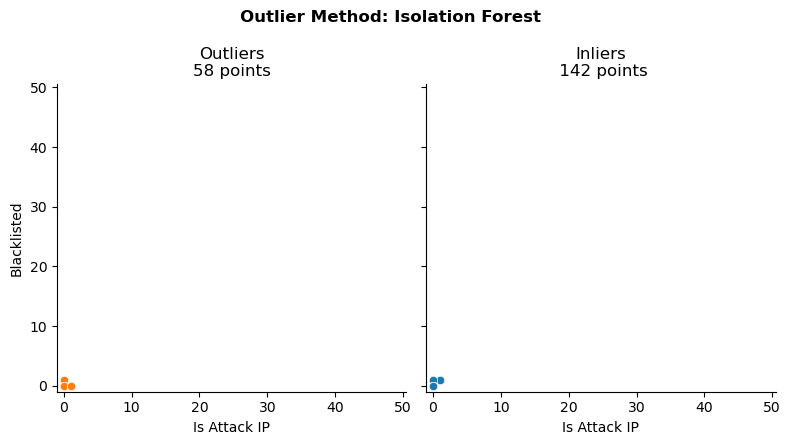

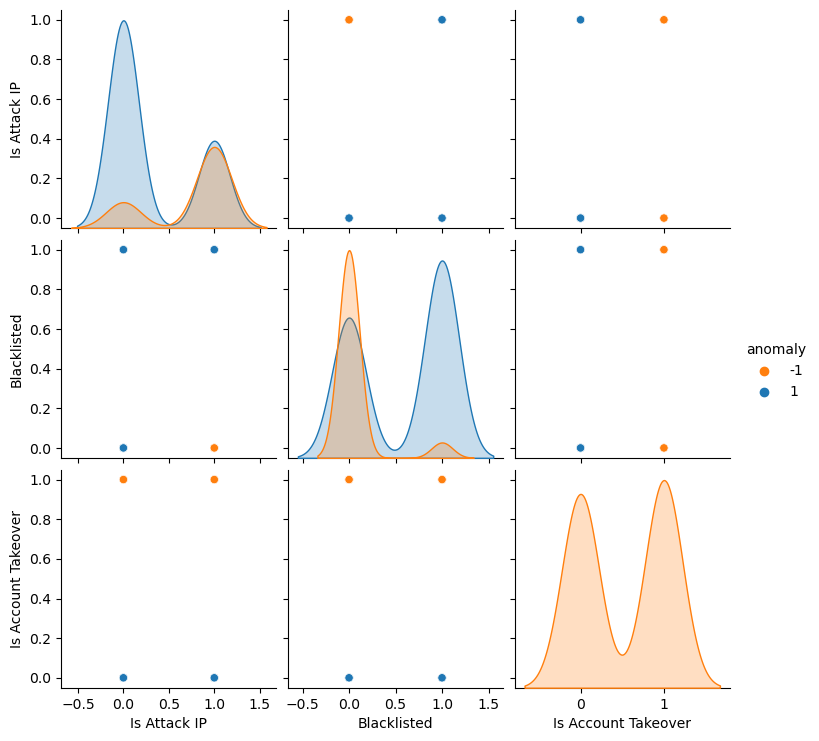

In [163]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
df.info()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASN                  200 non-null    float64
 1   Country              200 non-null    int8   
 2   Device Type          200 non-null    int8   
 3   IP Address           200 non-null    int16  
 4   Is Account Takeover  200 non-null    bool   
 5   Is Attack IP         200 non-null    bool   
 6   Login Successful     200 non-null    bool   
 7   Login Timestamp      200 non-null    int16  
 8   User ID              200 non-null    float64
 9   Blacklisted          200 non-null    bool   
 10  Browser Type         200 non-null    int8   
dtypes: bool(4), float64(2), int16(2), int8(3)
memory usage: 5.4 KB
Outlier Method: Isolation Forest
Number of anomalous values 20
Number of non anomalous values  180
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


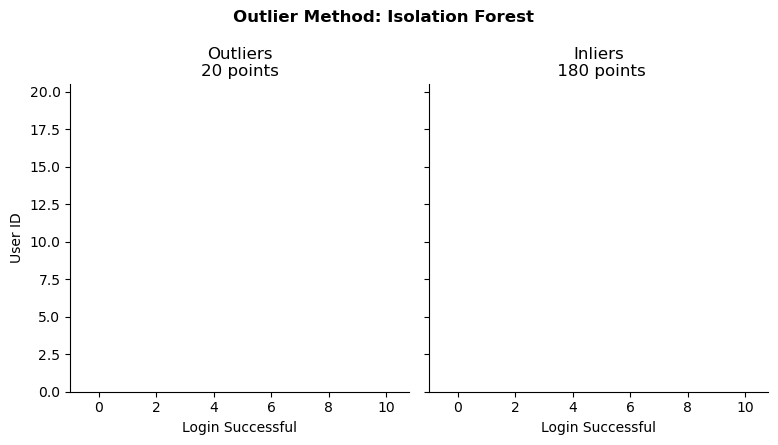

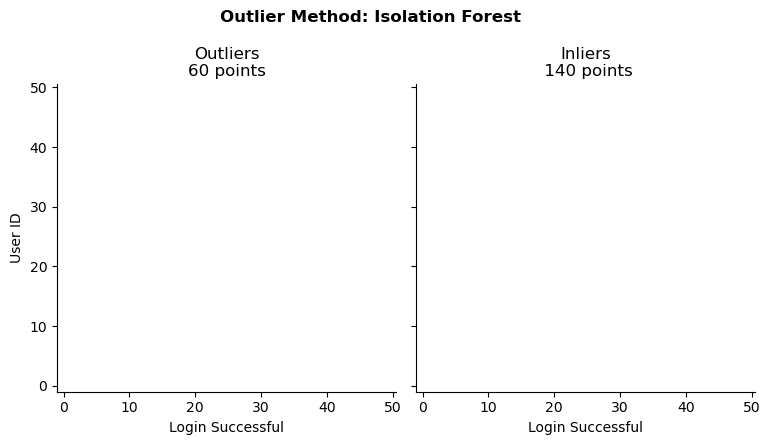

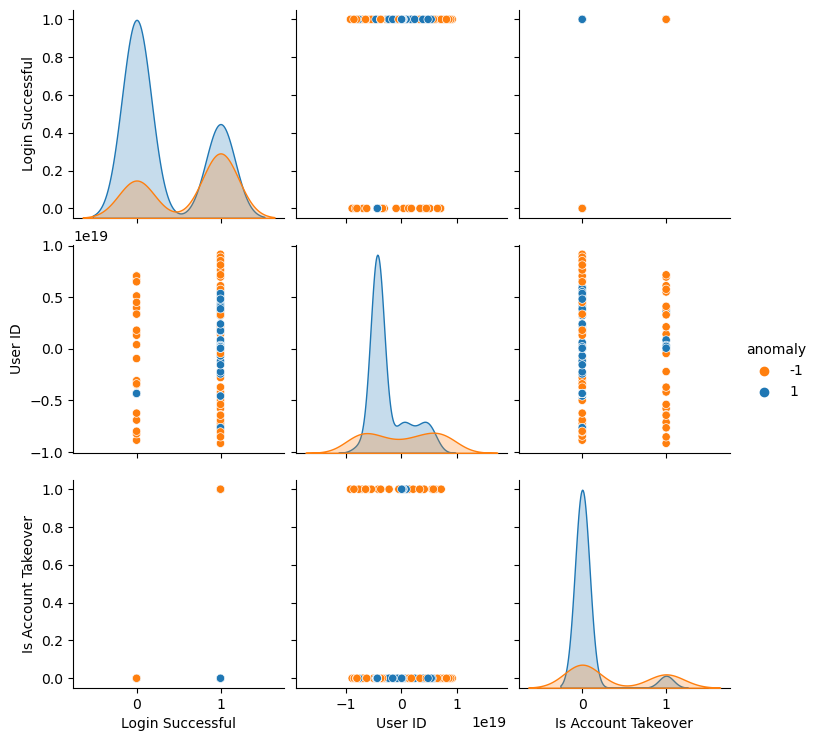

In [164]:
df = df2.copy()
df.info()
anomaly_inputs = ['Login Successful', 'User ID', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'User ID','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(30, 11) (170, 11)
(200, 10)
(200,)
Isolation Forest: 52
Accuracy Score :
0.74
Classification Report :
              precision    recall  f1-score   support

       False       0.86      0.83      0.84       170
        True       0.19      0.23      0.21        30

    accuracy                           0.74       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.76      0.74      0.75       200

Local Outlier Factor: 52
Accuracy Score :
0.74
Classification Report :
              precision    recall  f1-score   support

       False       0.86      0.83      0.84       170
        True       0.19      0.23      0.21        30

    accuracy                           0.74       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.76      0.74      0.75       200

Support Vector Machine: 152
Accuracy Score :
0.24
Classification Report :
              precision    recall  f1-score   support

       False       0.69      0.19      0.30

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


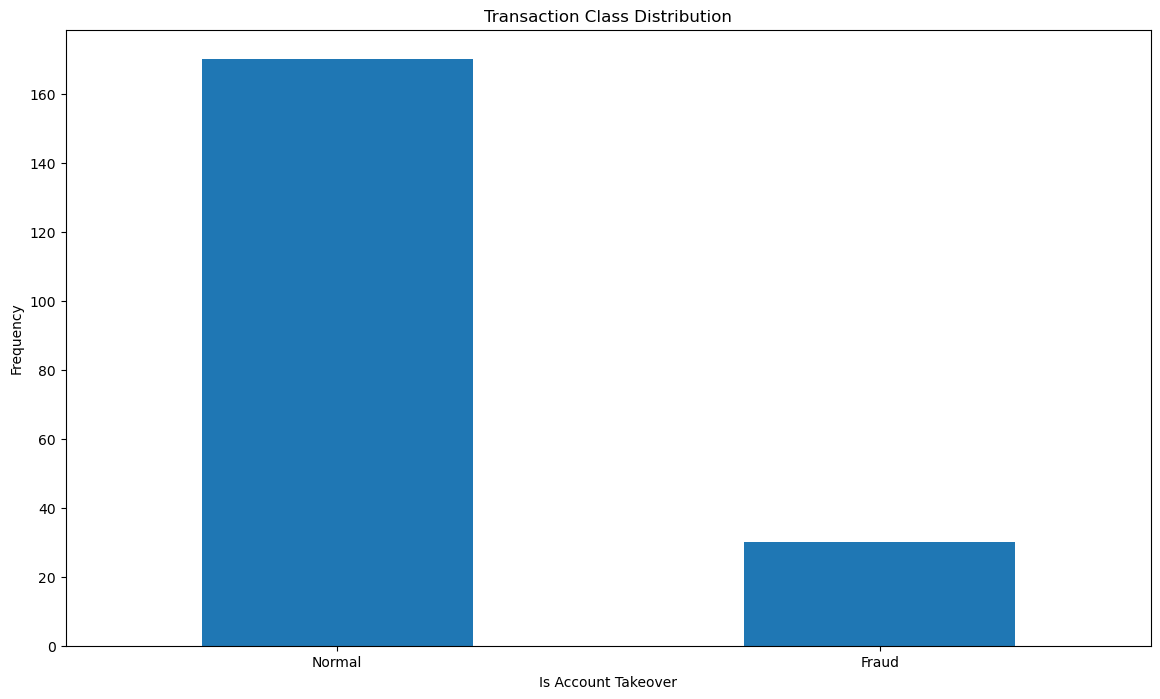

In [169]:
### iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [172]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 419 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(413)
memory usage: 84.7 KB


,ASN,Is Account Takeover,Is Attack IP,Login Successful,User ID,Blacklisted,cntr_AM,cntr_AR,cntr_AU,cntr_BA,...,lgnt_2021-02-28 23:56:23.148,lgnt_2021-02-28 23:56:44.382,lgnt_2021-02-28 23:57:00.409,lgnt_2021-02-28 23:57:20.002,lgnt_2021-02-28 23:58:04.017,lgnt_2021-02-28 23:58:44.011,lgnt_2021-02-28 23:59:22.608,brw_C,brw_F,brw_O
0,393398.0,False,True,False,-4.324476e+18,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,197357.0,True,False,True,-4.464800e+17,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,36218.0,False,False,False,-4.324476e+18,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,29695.0,False,False,True,3.835619e+18,False,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,393398.0,False,False,False,-3.458976e+18,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 419 entries, ASN to Is Account Takeover
dtypes: bool(4), float64(2), uint8(413)
memory usage: 84.7 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 98.48%
              precision    recall  f1-score   su

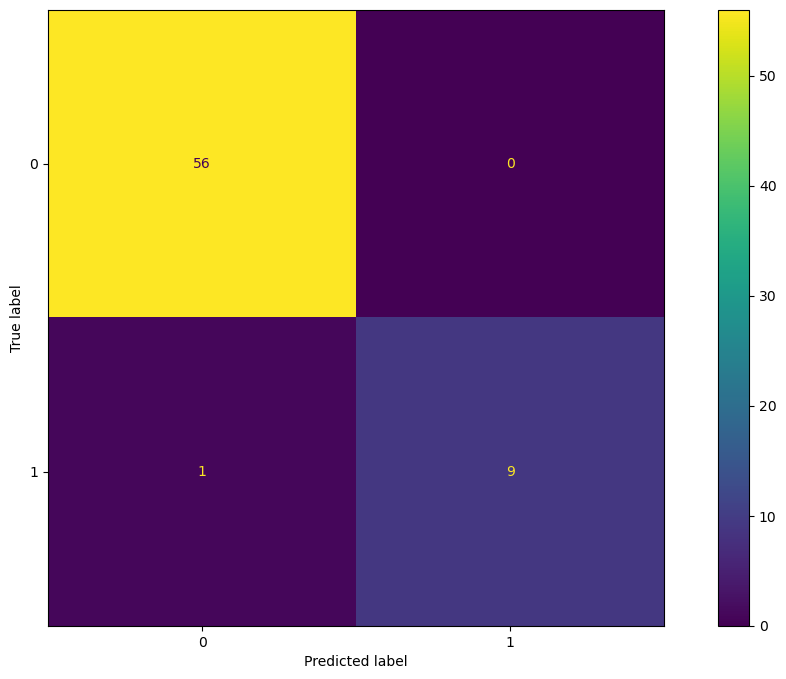

In [173]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:418]
Y = dataset.iloc[:,418]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 160
The number of records in the test dataset is 40
The training dataset has 134 records for the majority class and 26 records for the minority class.
              precision    recall  f1-score   support

       False       1.00      0.03      0.05        36
        True       0.10      1.00      0.19         4

    accuracy                           0.12        40
   macro avg       0.55      0.51      0.12        40
weighted avg       0.91      0.12      0.07        40

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.90      1.00      0.95        36
        True       0.00      0.00      0.00         4

    accuracy                           0.90        40
   macro avg       0.45      0.50      0.47        40
weighted avg       0.81      0.90      0.85        40

[[ 1 35]
 [ 0  4]]


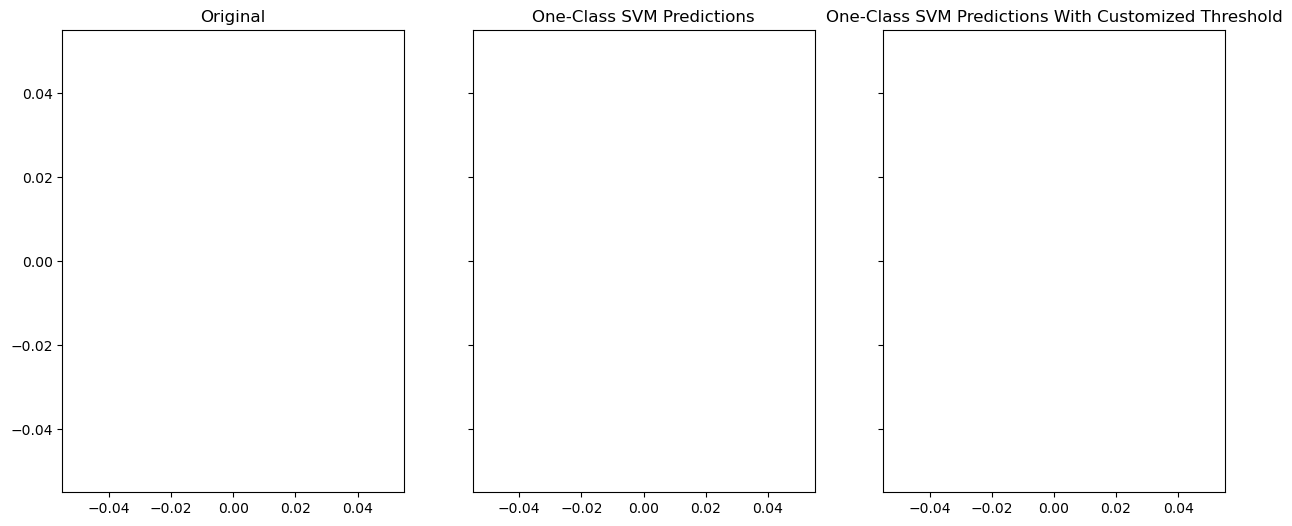

In [174]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:418]
Y = dataset.iloc[:,418]

# Convert the data from numpy array to a pandas dataframe
# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

In [175]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
df.info()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 419 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(413)
memory usage: 84.7 KB


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Is Attack IP,Blacklisted,anomaly_scores,anomaly,Is Account Takeover
0,True,True,0.076295,1,False
1,False,False,-0.024858,-1,True
2,False,False,0.113536,1,False
3,False,False,0.113536,1,False
4,False,True,0.088005,1,False
...,...,...,...,...,...
195,False,False,0.113536,1,False
196,False,False,-0.024858,-1,True
197,True,True,0.076295,1,False
198,True,False,0.059781,1,False


Outlier Method: Isolation Forest
Number of anomalous values 14
Number of non anomalous values  186
Total Number of Values: 200


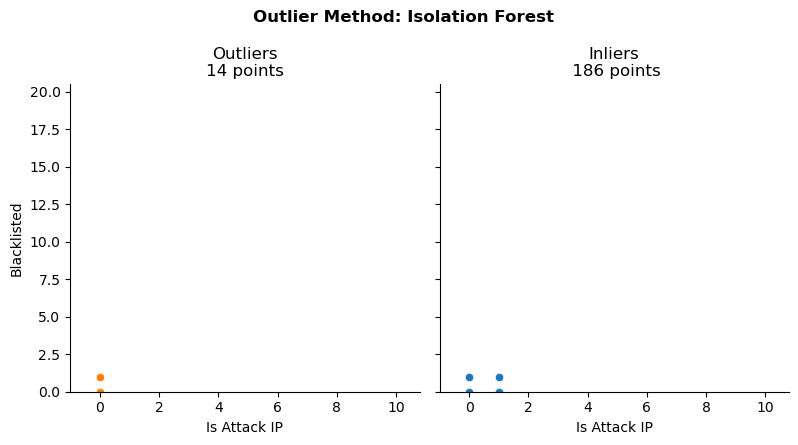

In [176]:
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 10.8], [0, 20.5]);

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 58
Number of non anomalous values  142
Total Number of Values: 200


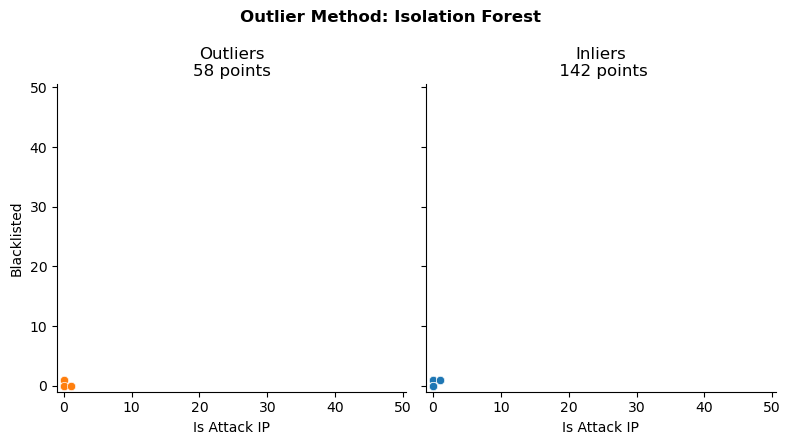

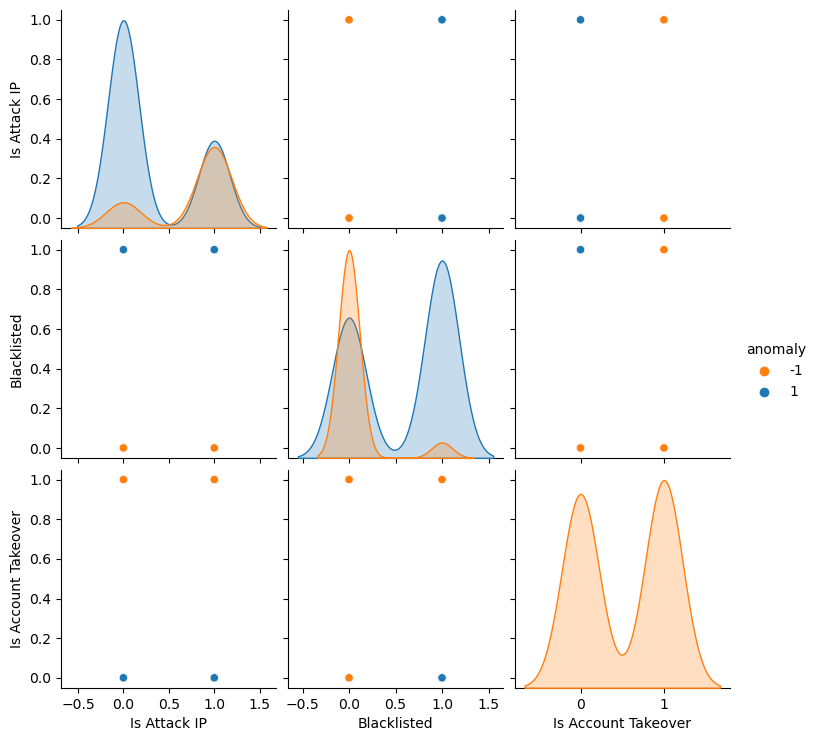

In [177]:
# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 419 entries, ASN to brw_O
dtypes: bool(4), float64(2), uint8(413)
memory usage: 84.7 KB
Outlier Method: Isolation Forest
Number of anomalous values 20
Number of non anomalous values  180
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


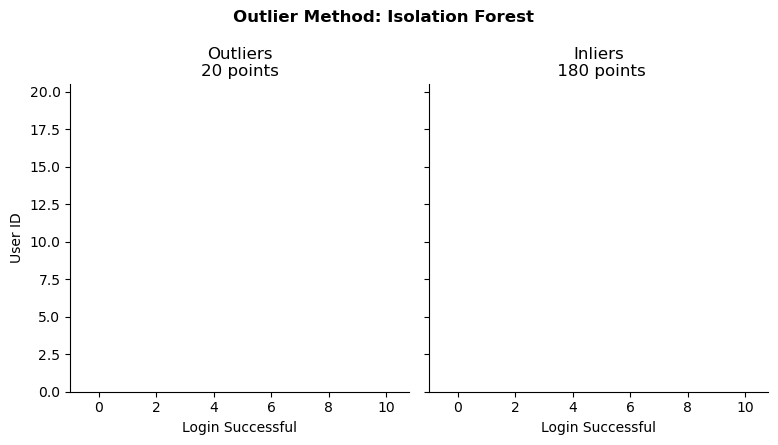

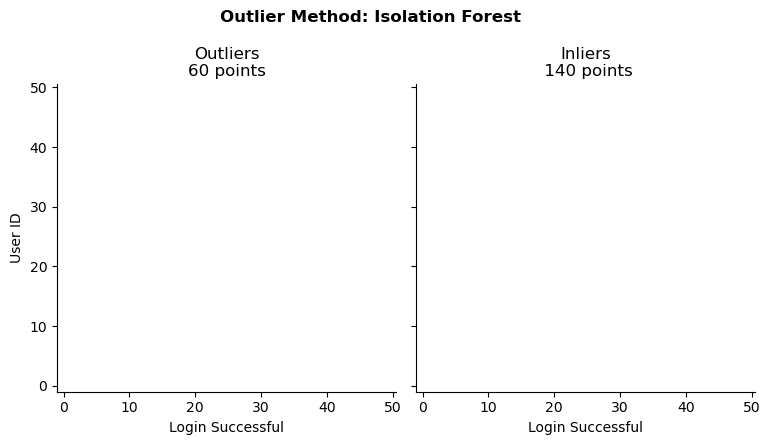

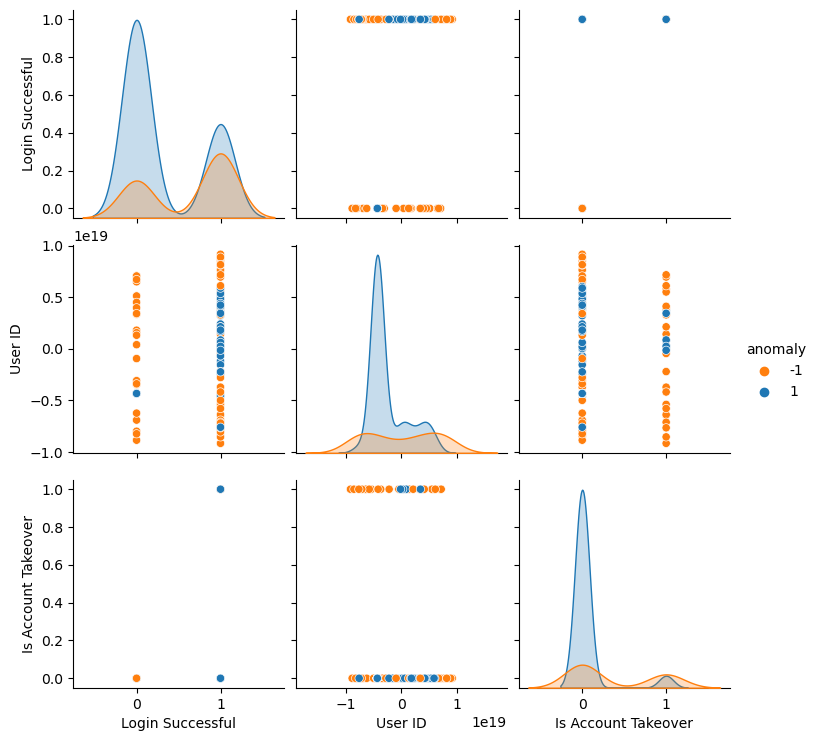

In [178]:
df = df3.copy()
df.info()
anomaly_inputs = ['Login Successful', 'User ID', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'User ID','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(30, 419) (170, 419)
(200, 418)
(200,)
Isolation Forest: 58
Accuracy Score :
0.71
Classification Report :
              precision    recall  f1-score   support

       False       0.84      0.81      0.83       170
        True       0.11      0.13      0.12        30

    accuracy                           0.71       200
   macro avg       0.48      0.47      0.47       200
weighted avg       0.73      0.71      0.72       200

Local Outlier Factor: 45
Accuracy Score :
0.775
Classification Report :
              precision    recall  f1-score   support

       False       0.88      0.85      0.87       170
        True       0.29      0.33      0.31        30

    accuracy                           0.78       200
   macro avg       0.58      0.59      0.59       200
weighted avg       0.79      0.78      0.78       200



/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Support Vector Machine: 152
Accuracy Score :
0.24
Classification Report :
              precision    recall  f1-score   support

       False       0.69      0.19      0.30       170
        True       0.10      0.50      0.16        30

    accuracy                           0.24       200
   macro avg       0.39      0.35      0.23       200
weighted avg       0.60      0.24      0.28       200



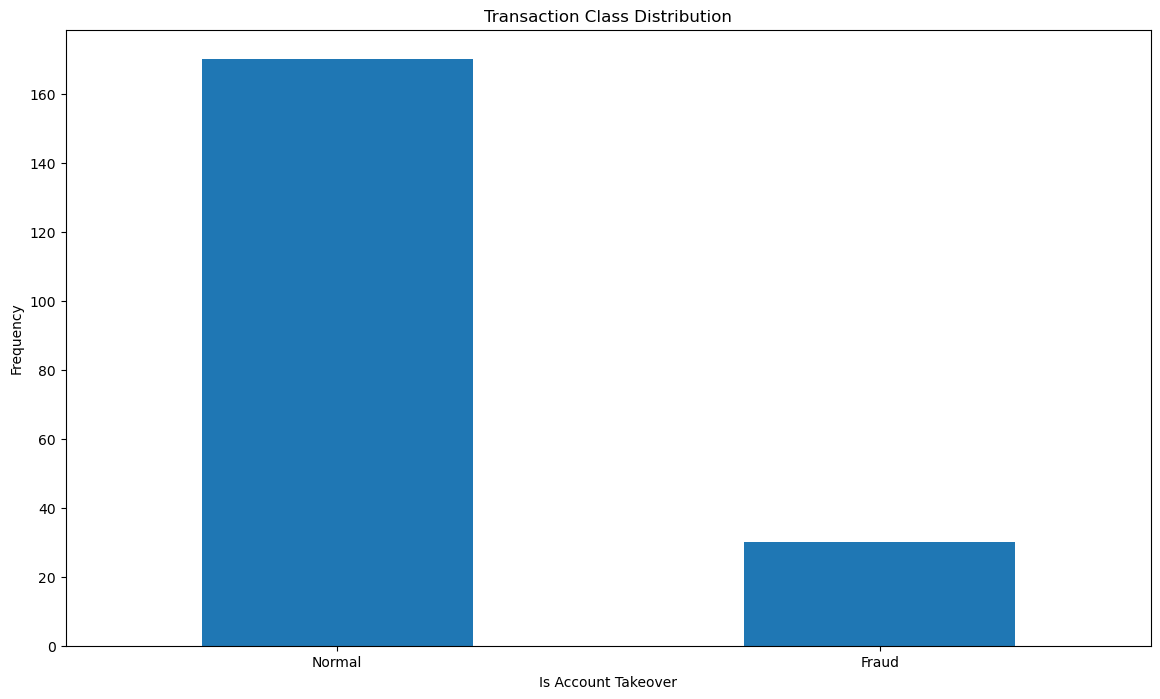

In [179]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

## New dataset with divide in ['Is Attack IP'] == True & ['Is Account Takeover'] == True 
### 77/200 ATO

In [180]:
import pandas as pd

attackAndTakeover = pd.read_csv('divided-chunks/attackAndTakeover77.csv')
restAttackAndTakeover = pd.read_csv('divided-chunks/restAttackAndTakeover31269187.csv')

In [181]:
import numpy as np

attackAndTakeover['Login Timestamp'] =  pd.to_datetime(attackAndTakeover['Login Timestamp'], infer_datetime_format=True)
restAttackAndTakeover['Login Timestamp'] =  pd.to_datetime(restAttackAndTakeover['Login Timestamp'], infer_datetime_format=True)

restAttackAndTakeover.dropna(axis = 0, how = 'all', inplace = True)
attackAndTakeover.dropna(axis = 0, how = 'all', inplace = True)

attackAndTakeover['IP Address'] = attackAndTakeover['IP Address'].apply(lambda x: str(x))
attackAndTakeover = attackAndTakeover.reset_index(drop=True)
restAttackAndTakeover['IP Address'] = restAttackAndTakeover['IP Address'].apply(lambda x: str(x))
restAttackAndTakeover = restAttackAndTakeover.reset_index(drop=True)

searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
attackAndTakeover["Blacklisted"] = np.where(attackAndTakeover["Country"].str.contains('|'.join(searchfor)), True, False)
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
attackAndTakeover = attackAndTakeover.replace(cleanup_devices)
restAttackAndTakeover["Blacklisted"] = np.where(restAttackAndTakeover["Country"].str.contains('|'.join(searchfor)), True, False)
restAttackAndTakeover = restAttackAndTakeover.replace(cleanup_devices)

attackAndTakeover["Browser Type"] = (np.where(attackAndTakeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(attackAndTakeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
attackAndTakeover = attackAndTakeover.replace(cleanup_browser)
restAttackAndTakeover["Browser Type"] = (np.where(restAttackAndTakeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(restAttackAndTakeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
restAttackAndTakeover = restAttackAndTakeover.replace(cleanup_browser)

In [182]:
attackAndTakeover.drop("OS Name and Version", inplace=True, axis=1)
attackAndTakeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    attackAndTakeover[col] = attackAndTakeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    attackAndTakeover[col] = attackAndTakeover[col].astype('bool')

restAttackAndTakeover.drop("OS Name and Version", inplace=True, axis=1)
restAttackAndTakeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    restAttackAndTakeover[col] = restAttackAndTakeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    restAttackAndTakeover[col] = restAttackAndTakeover[col].astype('bool')


In [183]:
attackAndTakeover.info()
restAttackAndTakeover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      77 non-null     category
 1   User ID              77 non-null     int64   
 2   IP Address           77 non-null     category
 3   Country              77 non-null     category
 4   ASN                  77 non-null     int64   
 5   Device Type          77 non-null     category
 6   Login Successful     77 non-null     bool    
 7   Is Attack IP         77 non-null     bool    
 8   Is Account Takeover  77 non-null     bool    
 9   Blacklisted          77 non-null     bool    
 10  Browser Type         77 non-null     category
dtypes: bool(4), category(5), int64(2)
memory usage: 7.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31269187 entries, 0 to 31269186
Data columns (total 11 columns):
 #   Column               Dtype   
---  ------             

In [184]:
df = pd.concat([attackAndTakeover, restAttackAndTakeover.head(123)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

df1 = df.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      200 non-null    category
 1   User ID              200 non-null    int64   
 2   IP Address           200 non-null    category
 3   Country              200 non-null    category
 4   ASN                  200 non-null    int64   
 5   Device Type          200 non-null    category
 6   Login Successful     200 non-null    bool    
 7   Is Attack IP         200 non-null    bool    
 8   Is Account Takeover  200 non-null    bool    
 9   Blacklisted          200 non-null    bool    
 10  Browser Type         200 non-null    category
dtypes: bool(4), category(5), int64(2)
memory usage: 21.4 KB


# Experimental XGBoost

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      200 non-null    category
 1   User ID              200 non-null    int64   
 2   IP Address           200 non-null    category
 3   Country              200 non-null    category
 4   ASN                  200 non-null    int64   
 5   Device Type          200 non-null    category
 6   Login Successful     200 non-null    bool    
 7   Is Attack IP         200 non-null    bool    
 8   Blacklisted          200 non-null    bool    
 9   Browser Type         200 non-null    category
 10  Is Account Takeover  200 non-null    bool    
dtypes: bool(4), category(5), int64(2)
memory usage: 21.4 KB


array([0.05303068, 0.04961958, 0.04258533, 0.17149086, 0.09822524,
       0.32898733, 0.01849183, 0.22940502, 0.00816409], dtype=float32)

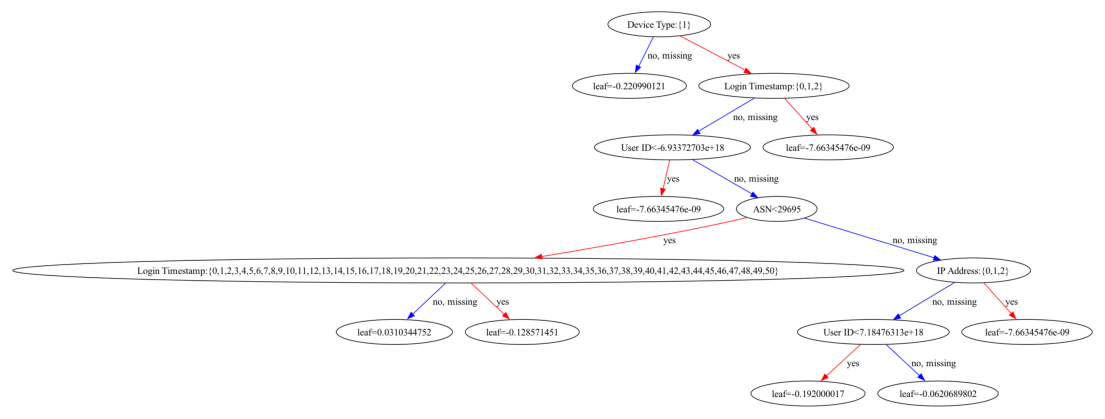

In [185]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:9]
Y = dataset.iloc[:,9]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
clf.feature_importances_

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [194]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      200 non-null    int16
 1   User ID              200 non-null    int64
 2   IP Address           200 non-null    int16
 3   Country              200 non-null    int8 
 4   ASN                  200 non-null    int64
 5   Device Type          200 non-null    int8 
 6   Login Successful     200 non-null    bool 
 7   Is Attack IP         200 non-null    bool 
 8   Is Account Takeover  200 non-null    bool 
 9   Blacklisted          200 non-null    bool 
 10  Browser Type         200 non-null    int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 5.4 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      200 non-null    int16
 1   User ID              200 non-null    int64
 2   IP Address           200 non-null    int16
 3   Country              200 non-null    int8 
 4   ASN                  200 non-null    int64
 5   Device Type          200 non-null    int8 
 6   Login Successful     200 non-null    bool 
 7   Is Attack IP         200 non-null    bool 
 8   Blacklisted          200 non-null    bool 
 9   Browser Type         200 non-null    int8 
 10  Is Account Takeover  200 non-null    bool 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 5.4 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enab

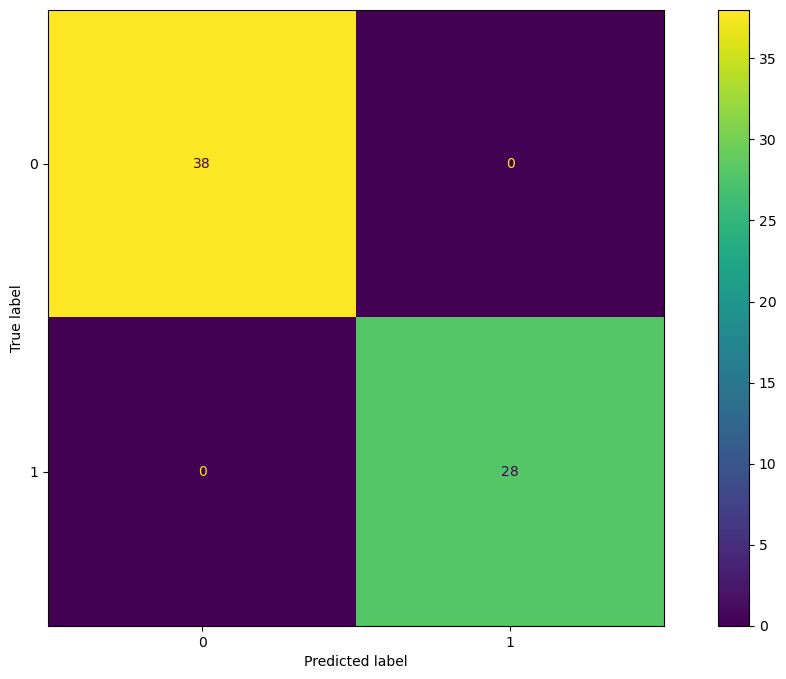

In [187]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 160
The number of records in the test dataset is 40
The training dataset has 100 records for the majority class and 60 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        23
        True       0.42      1.00      0.60        17

    accuracy                           0.42        40
   macro avg       0.21      0.50      0.30        40
weighted avg       0.18      0.42      0.25        40

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.57      1.00      0.73        23
        True       0.00      0.00      0.00        17

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40

[[ 0 23]
 [ 0 17]]


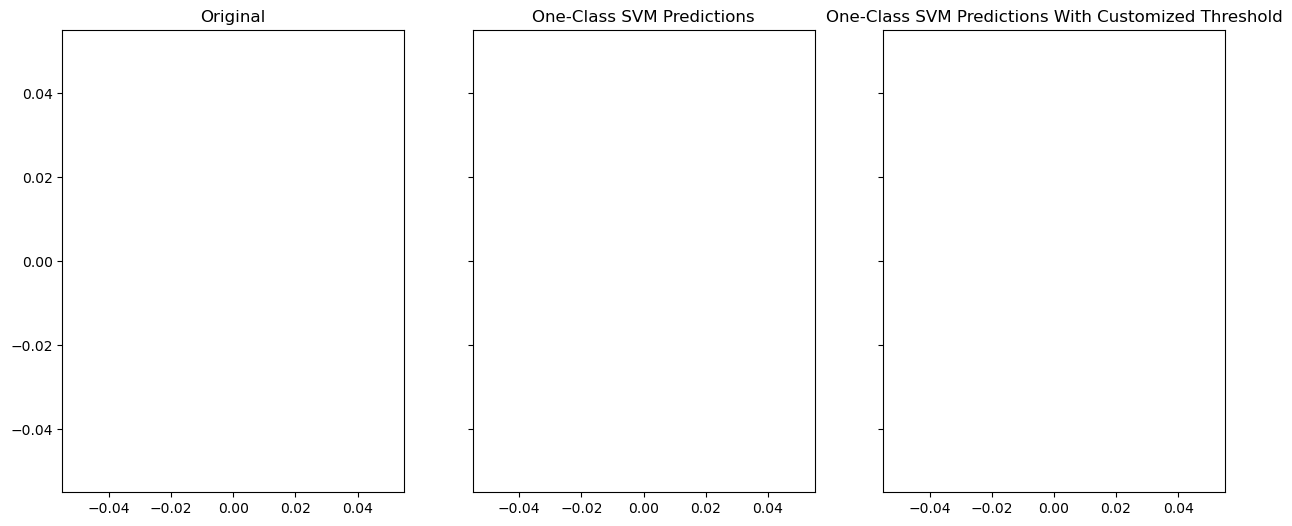

In [188]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Convert the data from numpy array to a pandas dataframe
# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      200 non-null    int16
 1   User ID              200 non-null    int64
 2   IP Address           200 non-null    int16
 3   Country              200 non-null    int8 
 4   ASN                  200 non-null    int64
 5   Device Type          200 non-null    int8 
 6   Login Successful     200 non-null    bool 
 7   Is Attack IP         200 non-null    bool 
 8   Is Account Takeover  200 non-null    bool 
 9   Blacklisted          200 non-null    bool 
 10  Browser Type         200 non-null    int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 5.4 KB
Outlier Method: Isolation Forest
Number of anomalous values 11
Number of non anomalous values  189
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 39
Number of non anomalous values  161
Total Number of Values: 200


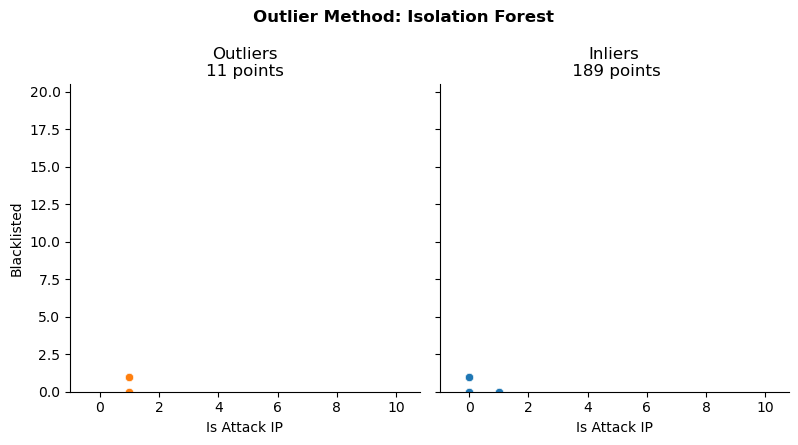

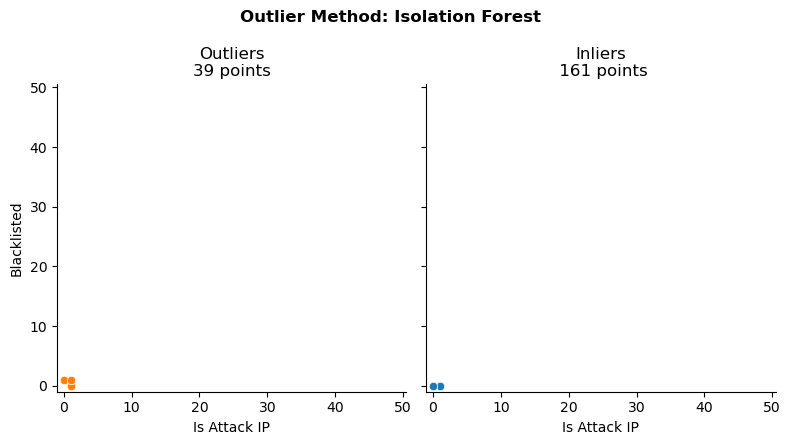

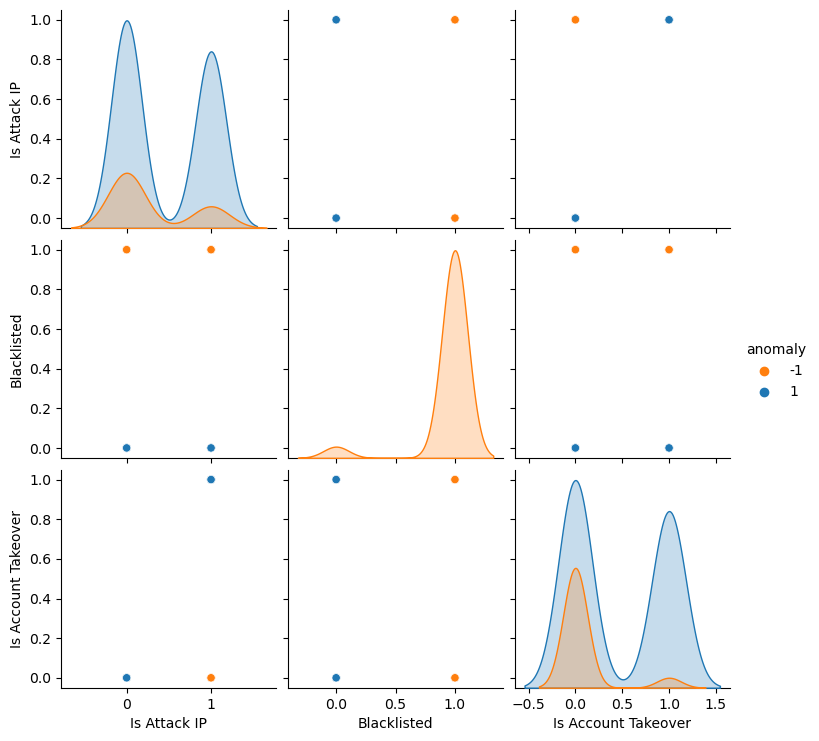

In [189]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      200 non-null    int16
 1   User ID              200 non-null    int64
 2   IP Address           200 non-null    int16
 3   Country              200 non-null    int8 
 4   ASN                  200 non-null    int64
 5   Device Type          200 non-null    int8 
 6   Login Successful     200 non-null    bool 
 7   Is Attack IP         200 non-null    bool 
 8   Is Account Takeover  200 non-null    bool 
 9   Blacklisted          200 non-null    bool 
 10  Browser Type         200 non-null    int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 5.4 KB
Outlier Method: Isolation Forest
Number of anomalous values 20
Number of non anomalous values  180
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


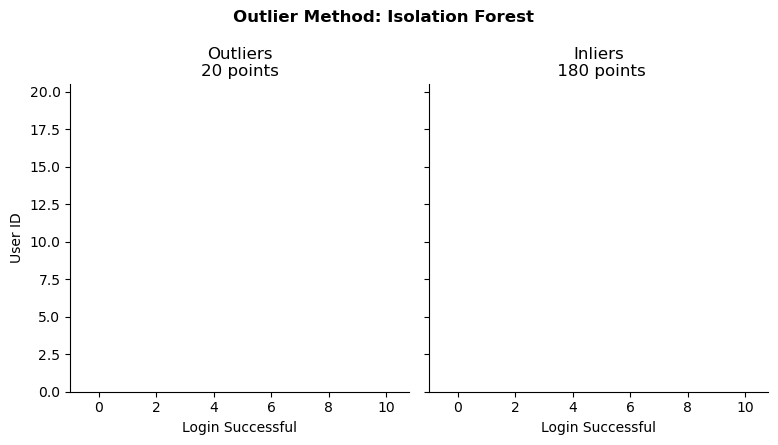

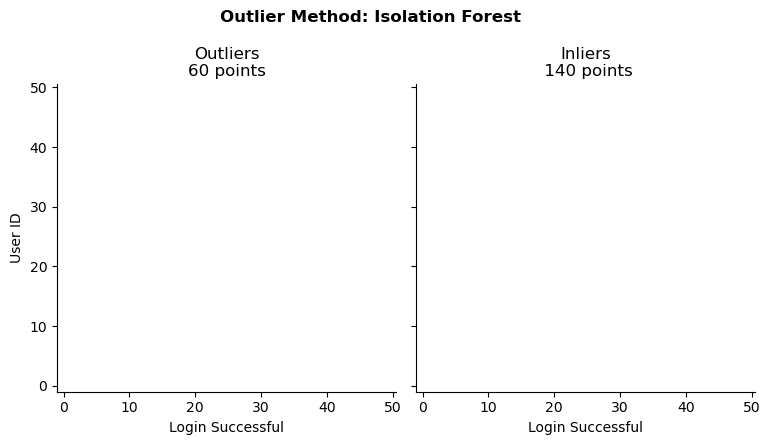

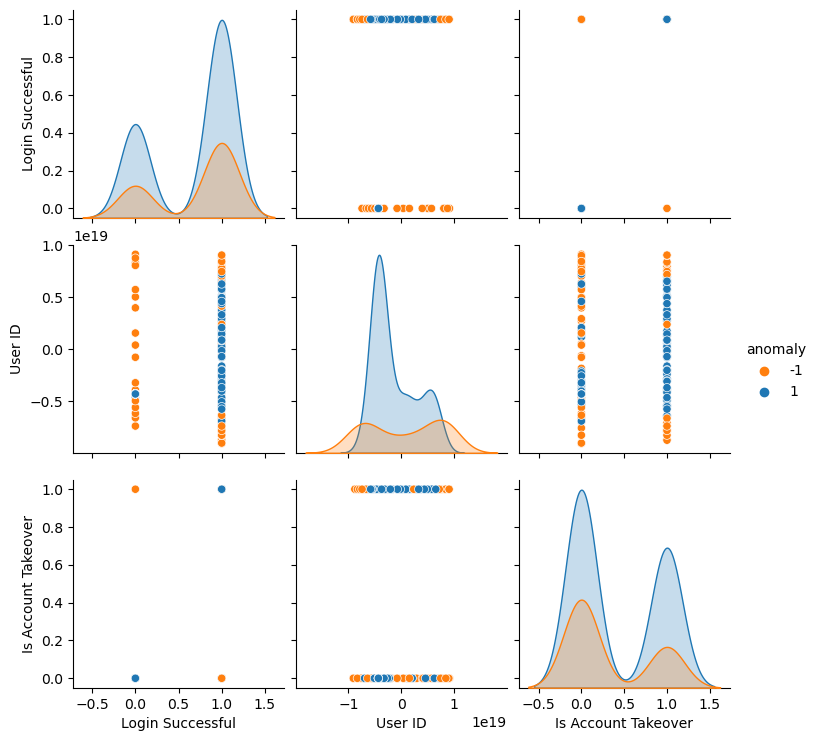

In [190]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'User ID', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'User ID','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### iForest, Local Outlier Factor, Support Vector Machine

In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      200 non-null    int16
 1   User ID              200 non-null    int64
 2   IP Address           200 non-null    int16
 3   Country              200 non-null    int8 
 4   ASN                  200 non-null    int64
 5   Device Type          200 non-null    int8 
 6   Login Successful     200 non-null    bool 
 7   Is Attack IP         200 non-null    bool 
 8   Is Account Takeover  200 non-null    bool 
 9   Blacklisted          200 non-null    bool 
 10  Browser Type         200 non-null    int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 5.4 KB


(77, 11) (123, 11)
(200, 10)
(200,)
Isolation Forest: 87
Accuracy Score :
0.565
Classification Report :
              precision    recall  f1-score   support

       False       0.60      0.88      0.71       123
        True       0.25      0.06      0.10        77

    accuracy                           0.56       200
   macro avg       0.42      0.47      0.41       200
weighted avg       0.47      0.56      0.48       200

Local Outlier Factor: 81
Accuracy Score :
0.595
Classification Report :
              precision    recall  f1-score   support

       False       0.62      0.90      0.73       123
        True       0.40      0.10      0.16        77

    accuracy                           0.59       200
   macro avg       0.51      0.50      0.45       200
weighted avg       0.53      0.59      0.51       200

Support Vector Machine: 119
Accuracy Score :
0.405
Classification Report :
              precision    recall  f1-score   support

       False       0.70      0.06      0

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


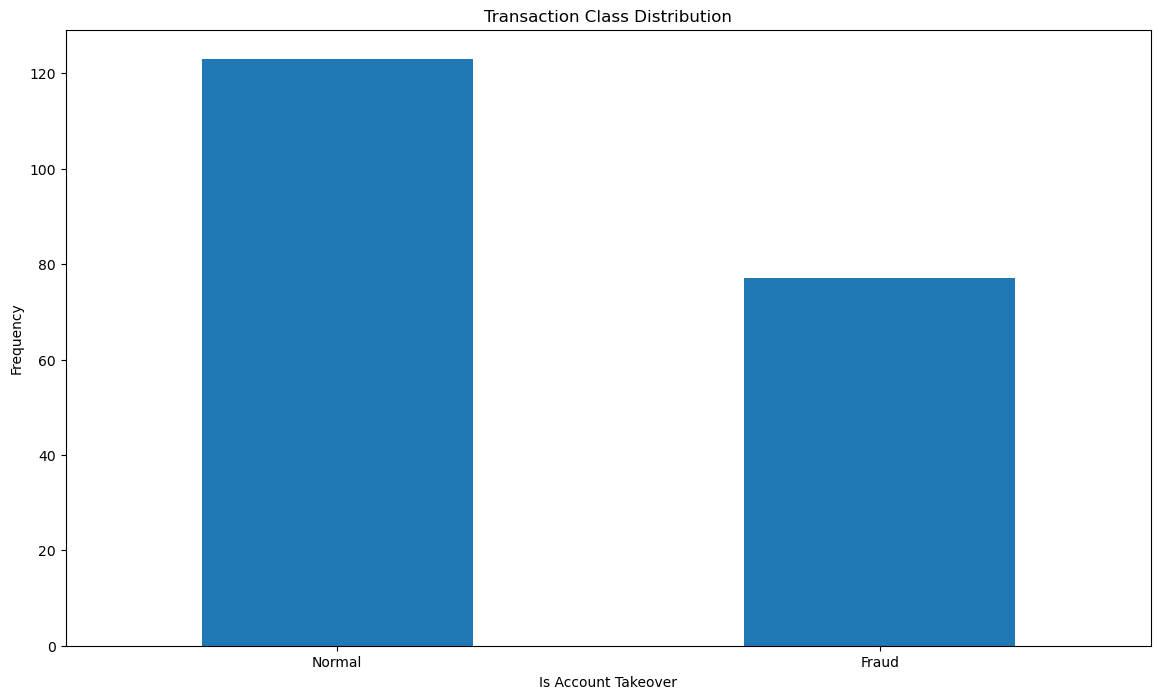

In [218]:
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding


In [219]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 398 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(392)
memory usage: 80.6 KB


,User ID,ASN,Login Successful,Is Attack IP,Is Account Takeover,Blacklisted,cntr_AU,cntr_BD,cntr_BR,cntr_CA,...,lgnt_2020-10-27 06:38:53.830,lgnt_2020-11-02 17:17:43.421,lgnt_2020-11-07 09:49:55.319,lgnt_2020-11-13 08:13:22.285,lgnt_2020-11-14 07:06:48.691,lgnt_2020-11-21 18:49:00.959,lgnt_2020-11-23 23:04:43.278,brw_C,brw_F,brw_O
0,4537402287908478266,29695,True,False,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-4324475583306591935,29492,False,False,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1855733646723088893,29695,True,False,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-4324475583306591935,393398,False,False,False,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-4324475583306591935,29695,False,False,False,True,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 398 entries, User ID to Is Account Takeover
dtypes: bool(4), int64(2), uint8(392)
memory usage: 80.6 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 98.48%
              precision    recall  f1-score   

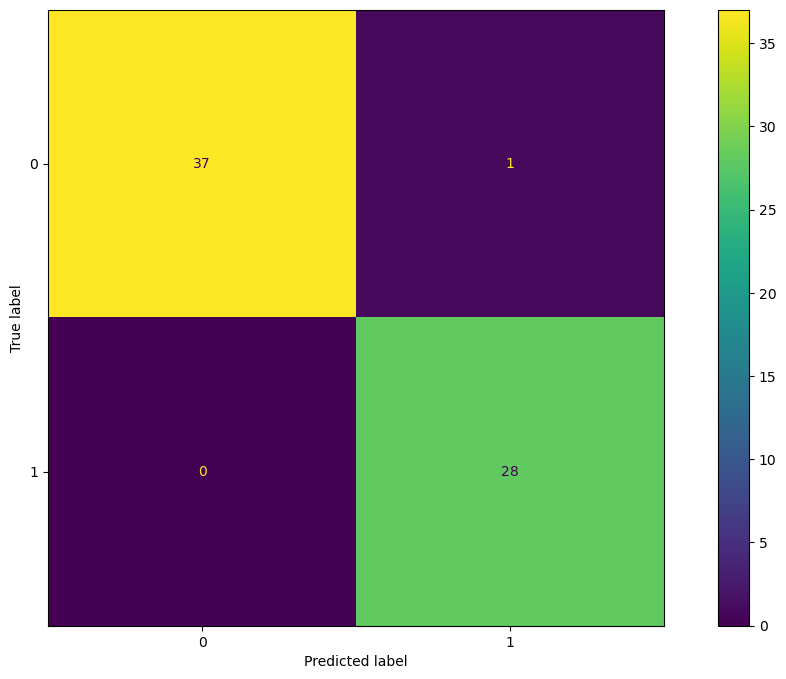

In [221]:
# XGBoost 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:397]
Y = dataset.iloc[:,397]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 160
The number of records in the test dataset is 40
The training dataset has 100 records for the majority class and 60 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        23
        True       0.42      1.00      0.60        17

    accuracy                           0.42        40
   macro avg       0.21      0.50      0.30        40
weighted avg       0.18      0.42      0.25        40

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.57      1.00      0.73        23
        True       0.00      0.00      0.00        17

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40

[[ 0 23]
 [ 0 17]]


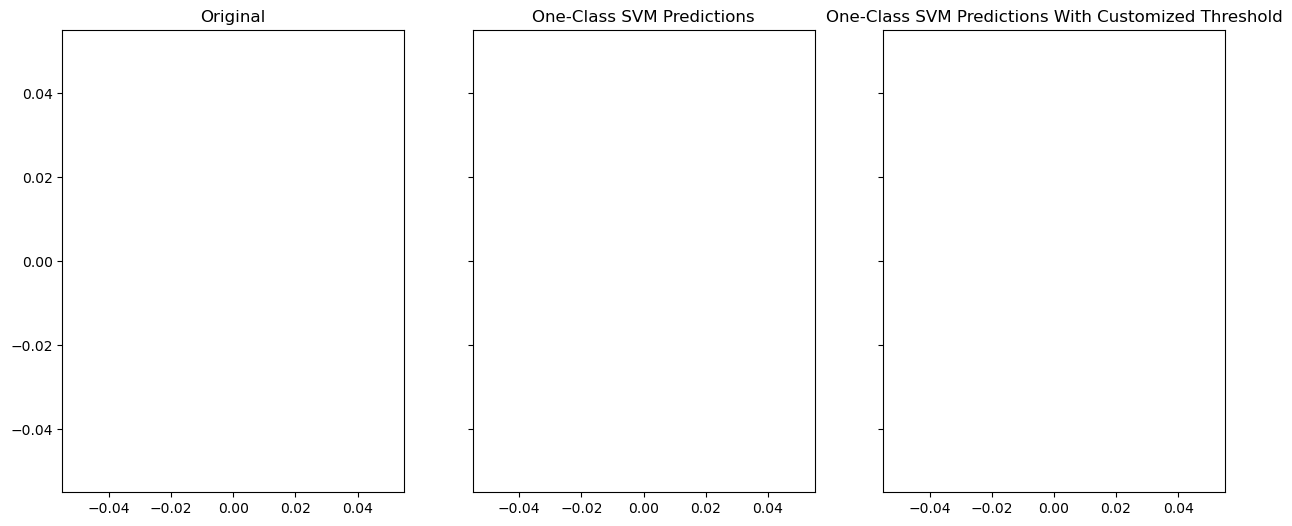

In [222]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:397]
Y = dataset.iloc[:,397]

# Convert the data from numpy array to a pandas dataframe
# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 398 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(392)
memory usage: 80.6 KB
Outlier Method: Isolation Forest
Number of anomalous values 11
Number of non anomalous values  189
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 39
Number of non anomalous values  161
Total Number of Values: 200


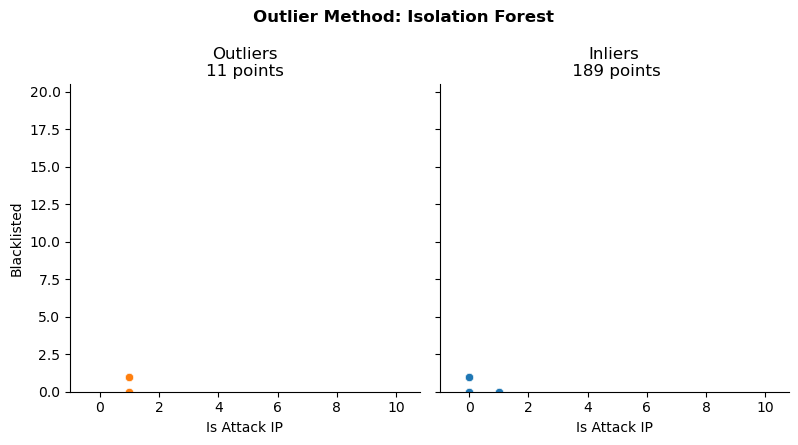

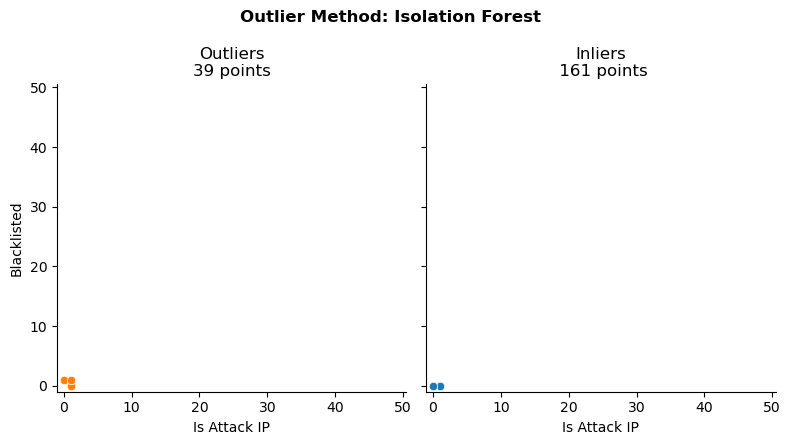

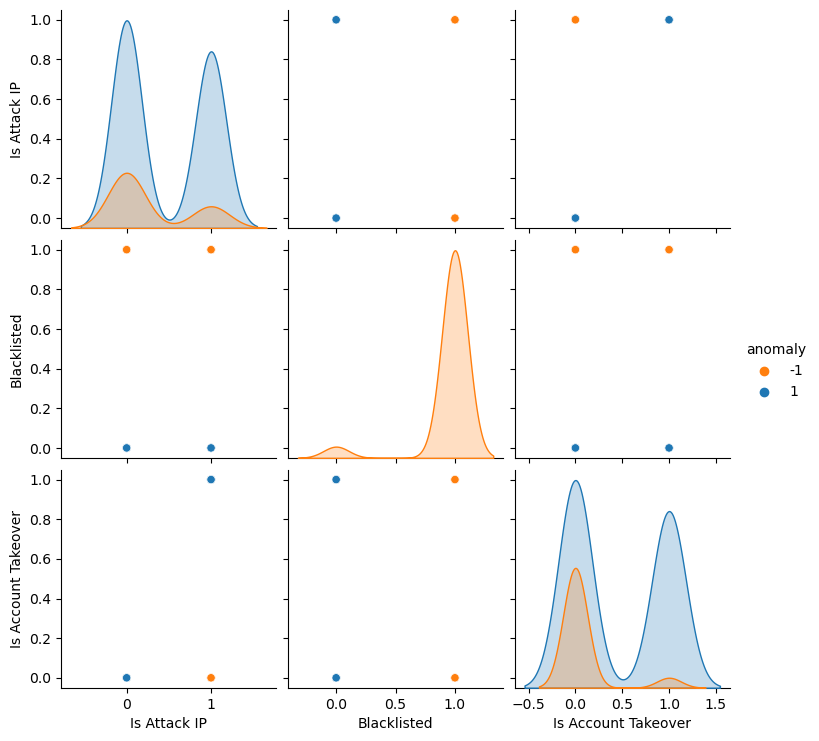

In [224]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
df.info()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 398 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(392)
memory usage: 80.6 KB
Outlier Method: Isolation Forest
Number of anomalous values 20
Number of non anomalous values  180
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


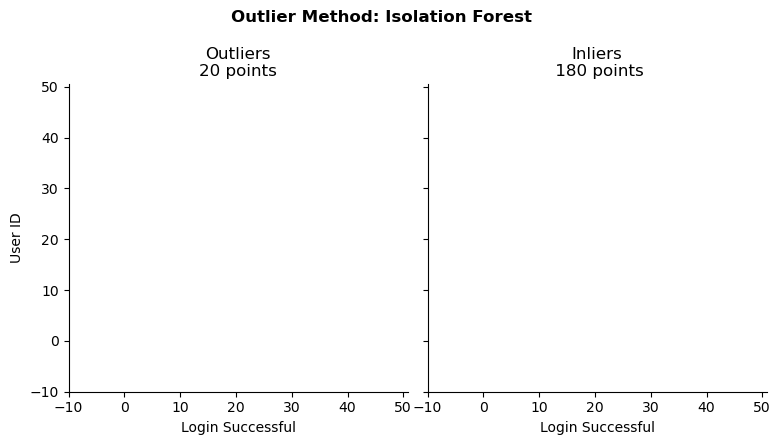

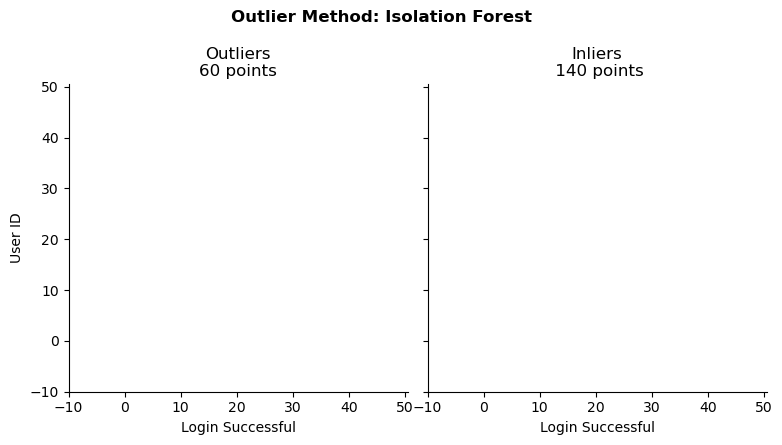

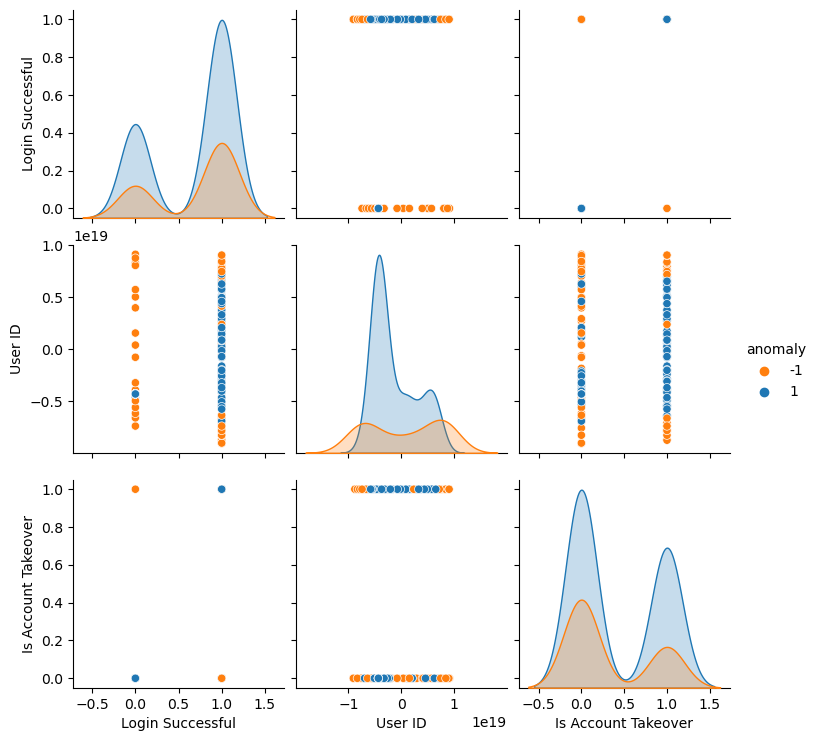

In [227]:
df = df3.copy()
df.info()
anomaly_inputs = ['Login Successful', 'User ID', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'User ID','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-10, 50.8], [-10, 50.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-10, 50.5], [-10, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 398) (123, 398)
(200, 397)
(200,)
Isolation Forest: 89
Accuracy Score :
0.555
Classification Report :
              precision    recall  f1-score   support

       False       0.59      0.87      0.71       123
        True       0.20      0.05      0.08        77

    accuracy                           0.56       200
   macro avg       0.40      0.46      0.39       200
weighted avg       0.44      0.56      0.47       200

Local Outlier Factor: 81
Accuracy Score :
0.595
Classification Report :
              precision    recall  f1-score   support

       False       0.62      0.90      0.73       123
        True       0.40      0.10      0.16        77

    accuracy                           0.59       200
   macro avg       0.51      0.50      0.45       200
weighted avg       0.53      0.59      0.51       200

Support Vector Machine: 119
Accuracy Score :
0.405
Classification Report :
              precision    recall  f1-score   support

       False       0.70      0.06    

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


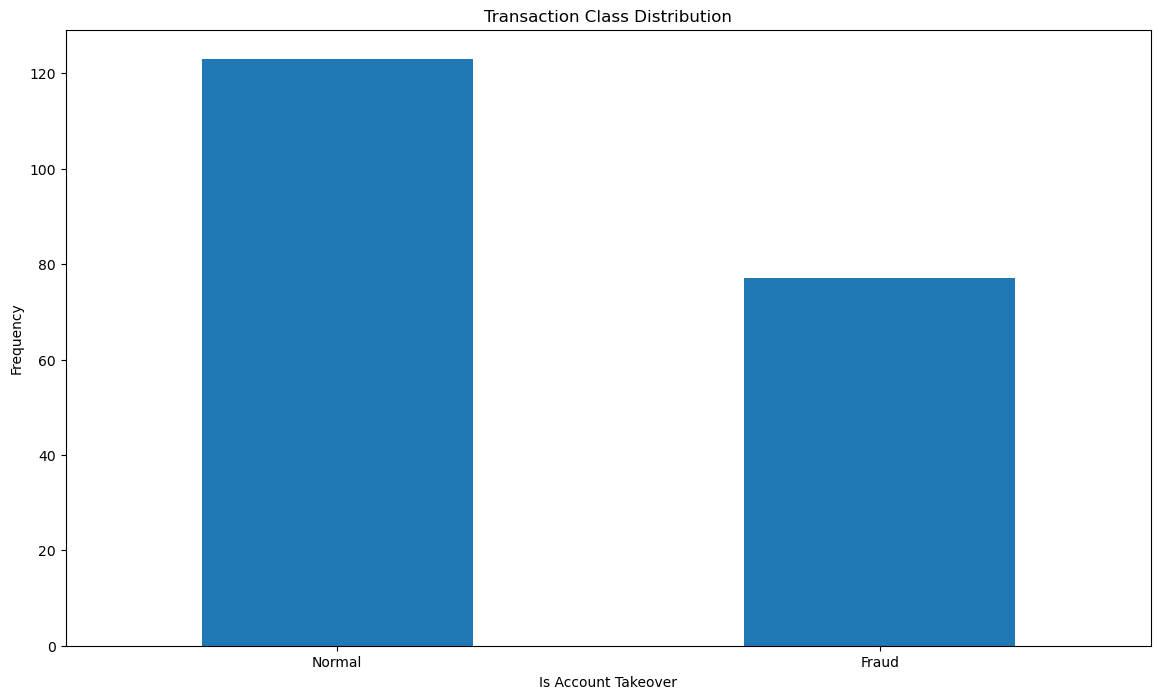

In [229]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

# New dataset with divide in ['Is Account Takeover'] == True
### 141/200 ATO

In [230]:
import pandas as pd

takeover = pd.read_csv('divided-chunks/takeover141.csv')
restTakeover = safe

In [231]:
import numpy as np

takeover['Login Timestamp'] =  pd.to_datetime(takeover['Login Timestamp'], infer_datetime_format=True)
takeover.dropna(axis = 0, how = 'all', inplace = True)

takeover['IP Address'] = takeover['IP Address'].apply(lambda x: str(x))
takeover = takeover.reset_index(drop=True)

searchfor = ['CN', 'VN', 'RU', 'BR', 'US', 'IN', 'IR', 'ID', 'KR', 'TW', 'FR', 'UA']
takeover["Blacklisted"] = np.where(takeover["Country"].str.contains('|'.join(searchfor)), True, False)
cleanup_devices = {"Device Type": {"tablet": "T", "mobile": "M", "desktop": "D", "bot": "B", "unknown": "U", np.nan: "NAN"}}
takeover = takeover.replace(cleanup_devices)

takeover["Browser Type"] = (np.where(takeover["Browser Name and Version"].str.contains('Firefox'), 2, 0) | np.where(takeover["Browser Name and Version"].str.contains('Chrome'), 1, 0))
cleanup_browser = {"Browser Type": {2: "F", 1: "C", 0: "O", np.nan: "NAN"}}
takeover = takeover.replace(cleanup_browser)

takeover.drop("OS Name and Version", inplace=True, axis=1)
takeover.drop("Browser Name and Version", inplace=True, axis=1)

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    takeover[col] = takeover[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    takeover[col] = takeover[col].astype('bool')

In [235]:
df = pd.concat([takeover, safe.head(59)], ignore_index=True, sort=False)
# shuffle dataframe in-place
df = df.sample(frac=1).reset_index(drop=True)

d1 = df.copy()
               
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df1[col] = df1[col].astype('category')

for col in ['Is Account Takeover', 'Is Attack IP', 'Login Successful']:
    df1[col] = df1[col].astype('bool')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      200 non-null    category
 1   User ID              200 non-null    int64   
 2   IP Address           200 non-null    category
 3   Country              200 non-null    category
 4   ASN                  200 non-null    int64   
 5   Device Type          200 non-null    category
 6   Login Successful     200 non-null    bool    
 7   Is Attack IP         200 non-null    bool    
 8   Is Account Takeover  200 non-null    bool    
 9   Blacklisted          200 non-null    bool    
 10  Browser Type         200 non-null    category
dtypes: bool(4), category(5), int64(2)
memory usage: 21.4 KB


# Experimental feature XGBoost (https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Login Timestamp      200 non-null    category
 1   User ID              200 non-null    int64   
 2   IP Address           200 non-null    category
 3   Country              200 non-null    category
 4   ASN                  200 non-null    int64   
 5   Device Type          200 non-null    category
 6   Login Successful     200 non-null    bool    
 7   Is Attack IP         200 non-null    bool    
 8   Blacklisted          200 non-null    bool    
 9   Browser Type         200 non-null    category
 10  Is Account Takeover  200 non-null    bool    
dtypes: bool(4), category(5), int64(2)
memory usage: 21.4 KB


array([0.118387  , 0.0012349 , 0.00642419, 0.2238188 , 0.00738945,
       0.00833171, 0.        , 0.634414  , 0.        , 0.        ],
      dtype=float32)

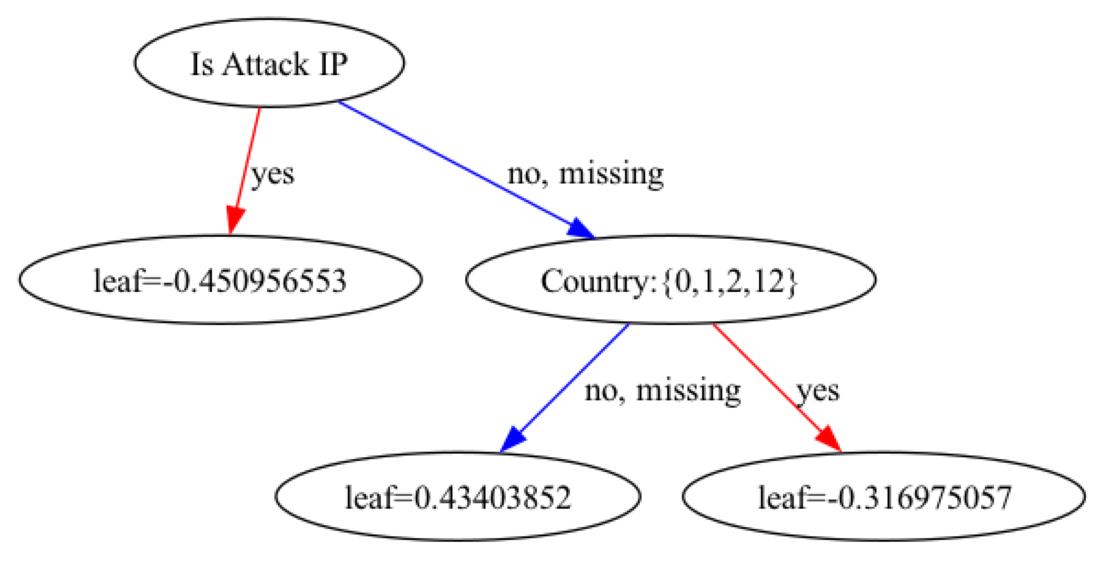

In [236]:
import xgboost
from xgboost import XGBClassifier
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = XGBClassifier(tree_method="hist", enable_categorical=True)

dataset = df1.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end
dataset.info()

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# X is the dataframe we created in previous snippet
clf.fit(X, Y)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model-attack-or-takeover.json")
# Get a graph
graph = xgboost.to_graphviz(clf, num_trees=1)
graph.save("caterogical-model-graph-attack-or-takeover.png")
# Or get a matplotlib axis
ax = xgboost.plot_tree(clf, num_trees=1)
# Get feature importances
clf.feature_importances_

### ENCODING CATEGORICAL VALUES -> Label Encoding

In [238]:
df2 = df1.copy()
for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df2[col] = df2[col].cat.codes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Login Timestamp      200 non-null    int16
 1   User ID              200 non-null    int64
 2   IP Address           200 non-null    int16
 3   Country              200 non-null    int8 
 4   ASN                  200 non-null    int64
 5   Device Type          200 non-null    int8 
 6   Login Successful     200 non-null    bool 
 7   Is Attack IP         200 non-null    bool 
 8   Is Account Takeover  200 non-null    bool 
 9   Blacklisted          200 non-null    bool 
 10  Browser Type         200 non-null    int8 
dtypes: bool(4), int16(2), int64(2), int8(3)
memory usage: 5.4 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Login Timestamp   200 non-null    int16
 1   User ID           200 non-null    int64
 2   IP Address        200 non-null    int16
 3   Country           200 non-null    int8 
 4   ASN               200 non-null    int64
 5   Device Type       200 non-null    int8 
 6   Login Successful  200 non-null    bool 
 7   Is Attack IP      200 non-null    bool 
 8   Blacklisted       200 non-null    bool 
 9   Browser Type      200 non-null    int8 
dtypes: bool(3), int16(2), int64(2), int8(3)
memory usage: 5.2 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None

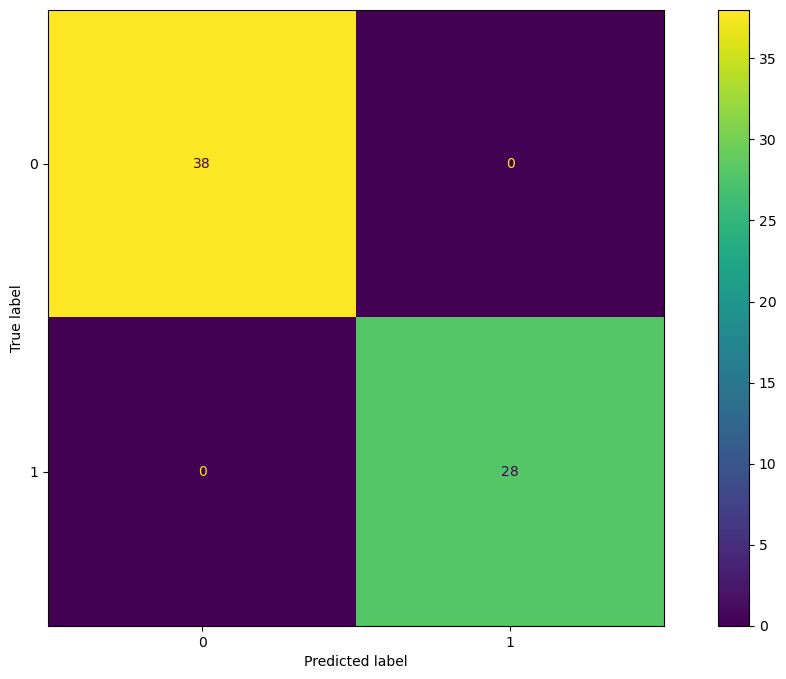

In [239]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 160
The number of records in the test dataset is 40
The training dataset has 100 records for the majority class and 60 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        23
        True       0.42      1.00      0.60        17

    accuracy                           0.42        40
   macro avg       0.21      0.50      0.30        40
weighted avg       0.18      0.42      0.25        40

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.57      1.00      0.73        23
        True       0.00      0.00      0.00        17

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40

[[ 0 23]
 [ 0 17]]


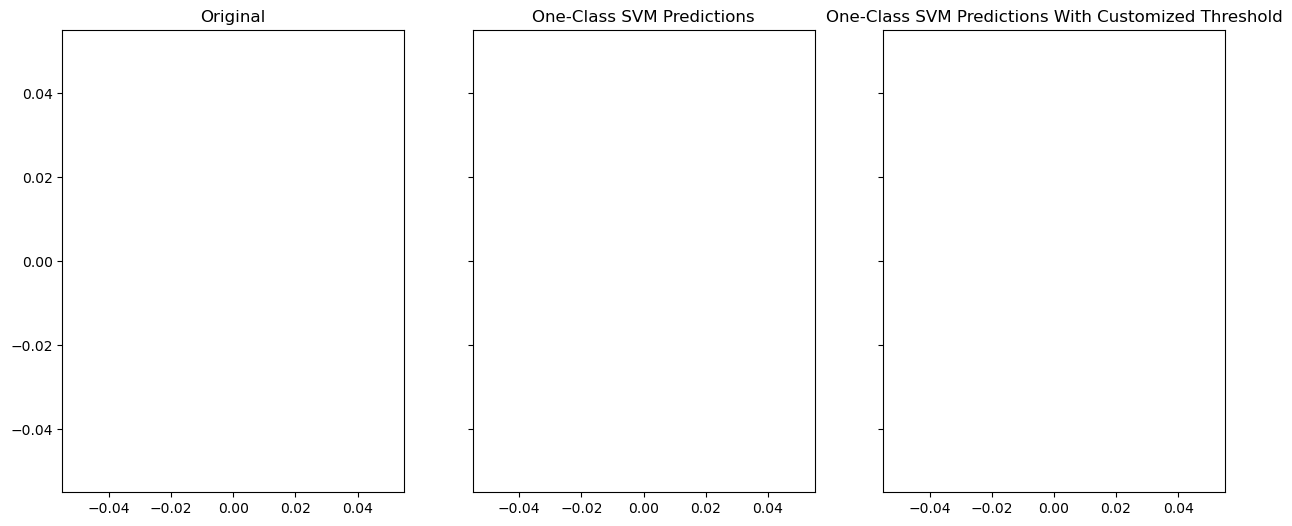

In [240]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df2.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:10]
Y = dataset.iloc[:,10]

# Convert the data from numpy array to a pandas dataframe
# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 11
Number of non anomalous values  189
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 39
Number of non anomalous values  161
Total Number of Values: 200


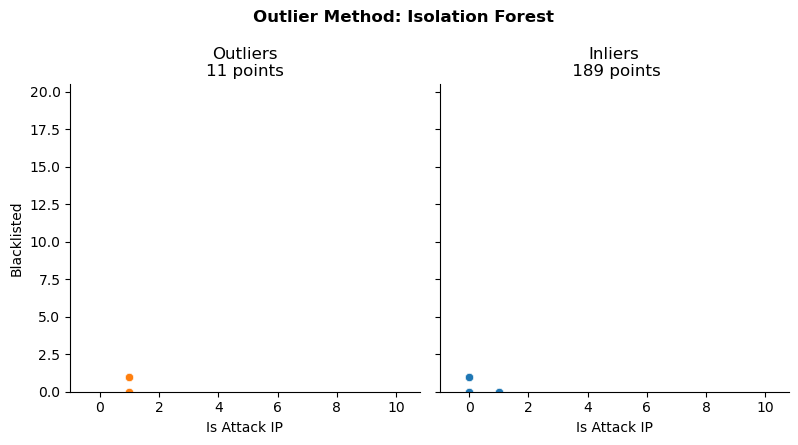

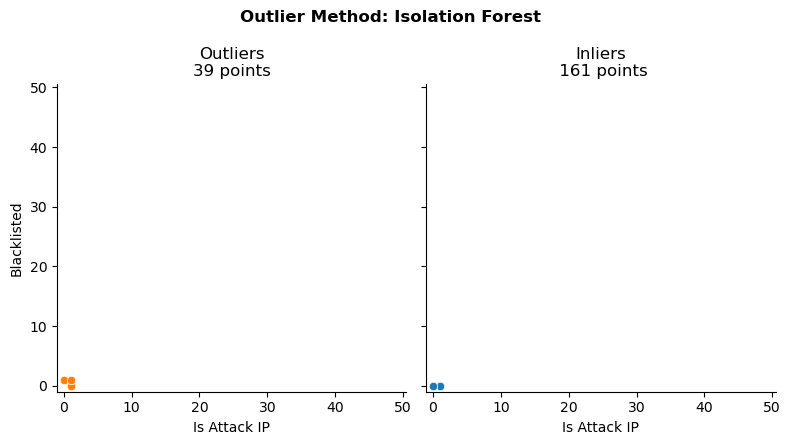

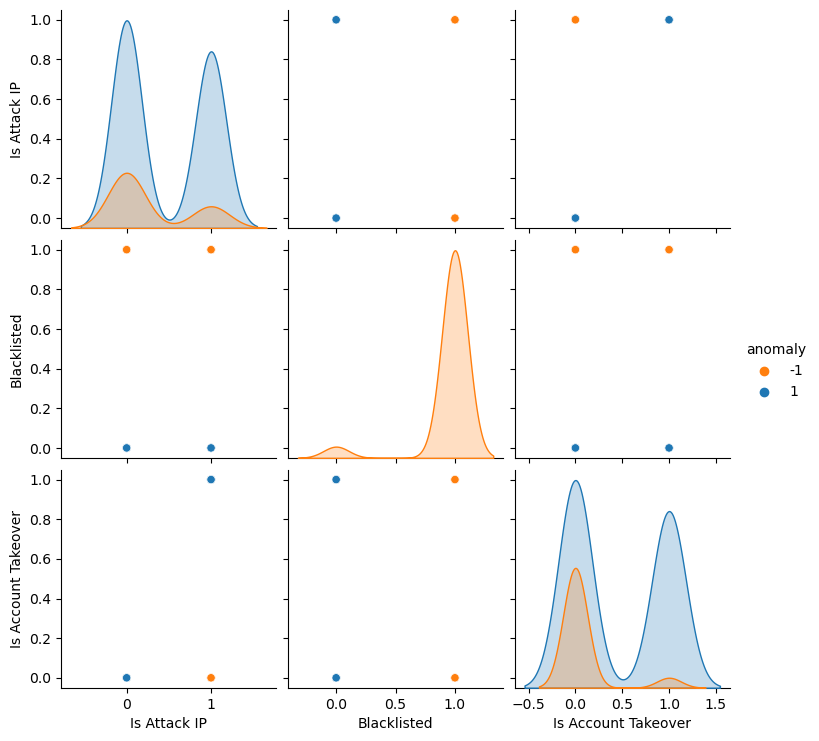

In [241]:
# Isolation Forest

# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df2.copy()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 20
Number of non anomalous values  180
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


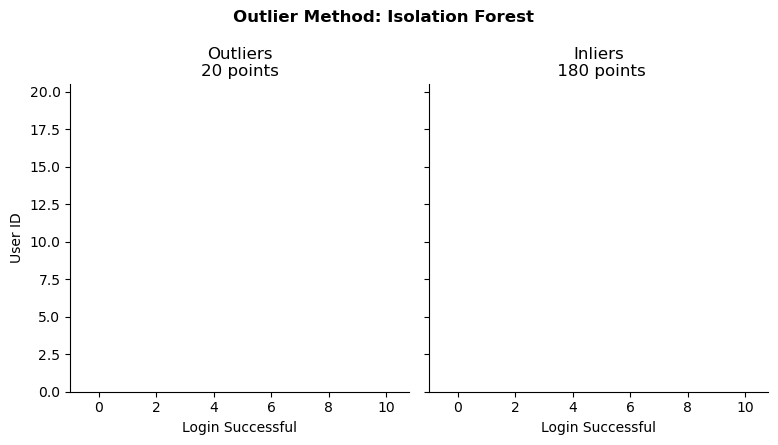

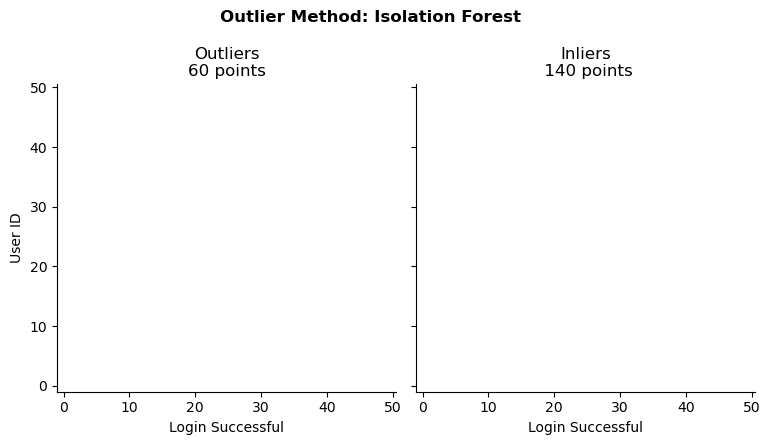

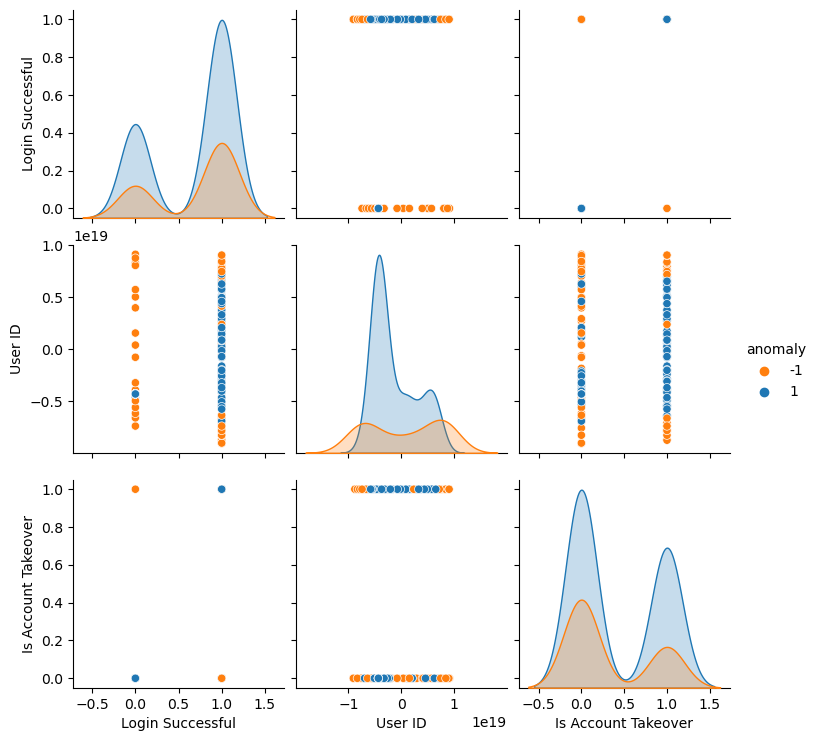

In [242]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'User ID', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'User ID','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 9
Number of non anomalous values  191
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 9
Number of non anomalous values  191
Total Number of Values: 200


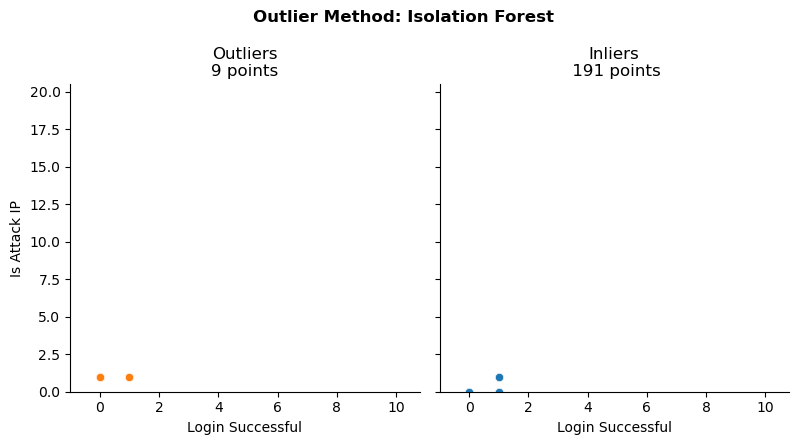

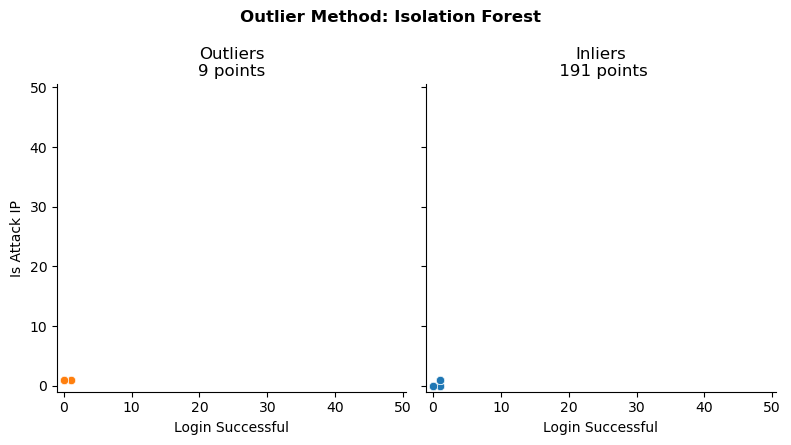

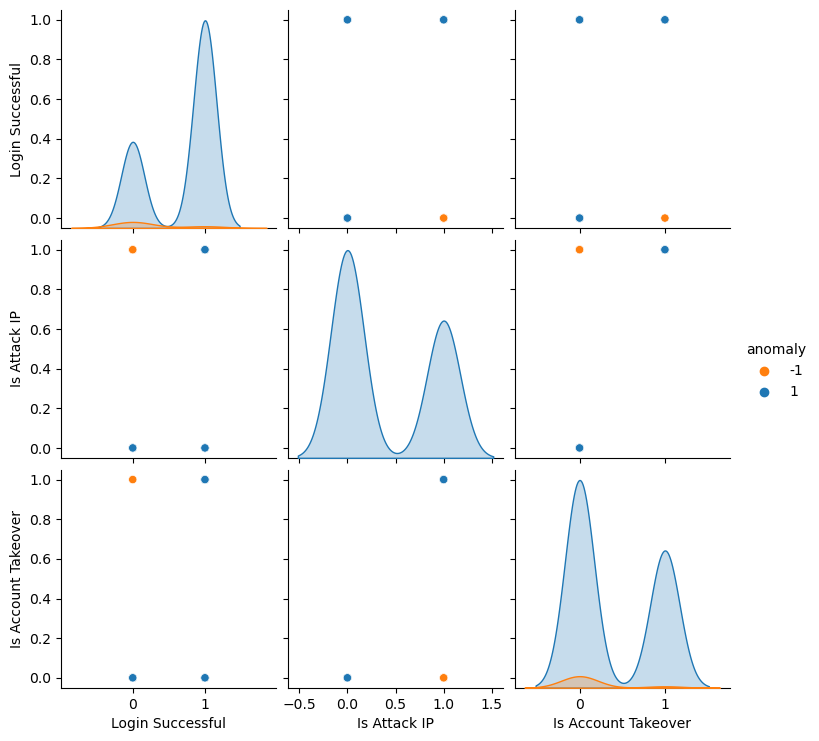

In [243]:
df = df2.copy()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 11) (123, 11)
(200, 10)
(200,)
Isolation Forest: 91
Accuracy Score :
0.545
Classification Report :
              precision    recall  f1-score   support

       False       0.59      0.86      0.70       123
        True       0.15      0.04      0.06        77

    accuracy                           0.55       200
   macro avg       0.37      0.45      0.38       200
weighted avg       0.42      0.55      0.45       200

Local Outlier Factor: 81
Accuracy Score :
0.595
Classification Report :
              precision    recall  f1-score   support

       False       0.62      0.90      0.73       123
        True       0.40      0.10      0.16        77

    accuracy                           0.59       200
   macro avg       0.51      0.50      0.45       200
weighted avg       0.53      0.59      0.51       200

Support Vector Machine: 119
Accuracy Score :
0.405
Classification Report :
              precision    recall  f1-score   support

       False       0.70      0.06      0

/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


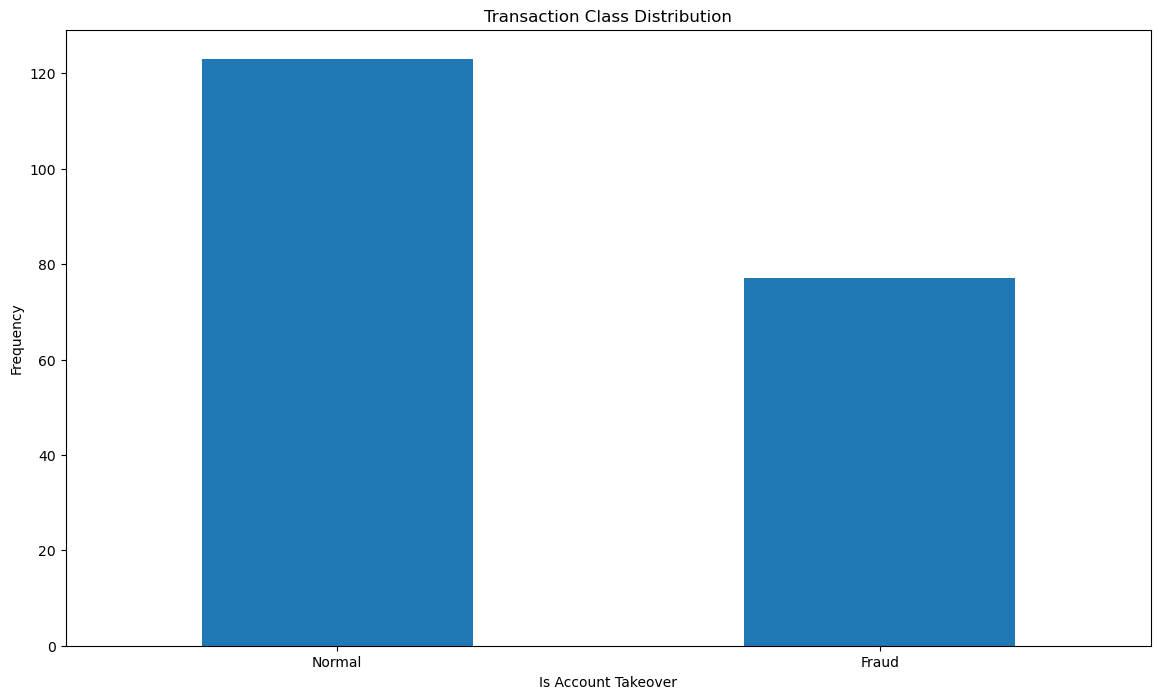

In [245]:
### iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df2.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

### ENCODING CATEGORICAL VALUES -> Dummy Variable Encoding

In [247]:
df3 = df1.copy()

for col in ['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type']:
    df3[col] = df3[col].astype('str')

df3 = pd.get_dummies(df3, columns=['Country', 'Device Type', 'IP Address', 'Login Timestamp', 'Browser Type'], prefix=["cntr", "dvc", "ip", "lgnt", "brw"])
df3 = pd.DataFrame(df3)

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 398 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(392)
memory usage: 80.6 KB


,User ID,ASN,Login Successful,Is Attack IP,Is Account Takeover,Blacklisted,cntr_AU,cntr_BD,cntr_BR,cntr_CA,...,lgnt_2020-10-27 06:38:53.830,lgnt_2020-11-02 17:17:43.421,lgnt_2020-11-07 09:49:55.319,lgnt_2020-11-13 08:13:22.285,lgnt_2020-11-14 07:06:48.691,lgnt_2020-11-21 18:49:00.959,lgnt_2020-11-23 23:04:43.278,brw_C,brw_F,brw_O
0,4537402287908478266,29695,True,False,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-4324475583306591935,29492,False,False,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1855733646723088893,29695,True,False,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-4324475583306591935,393398,False,False,False,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-4324475583306591935,29695,False,False,False,True,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 397 entries, User ID to brw_O
dtypes: bool(3), int64(2), uint8(392)
memory usage: 80.4 KB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 98.48%
              precision    recall  f1-score   support

     

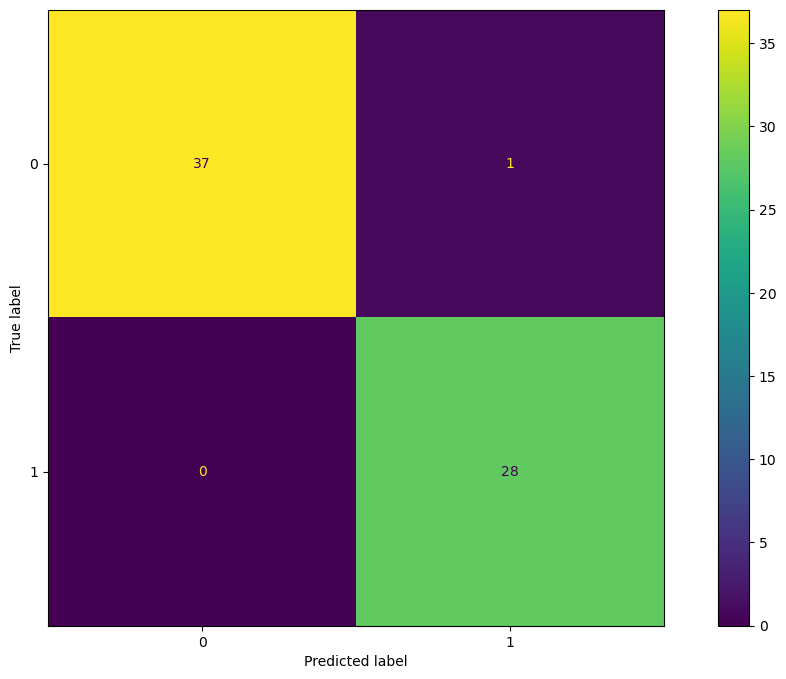

In [249]:
# XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:397]
Y = dataset.iloc[:,397]
X.info()

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, predictions)
print(report)

#conf matrix
matrix = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
cm_display = ConfusionMatrixDisplay(matrix).plot()

The number of records in the training dataset is 160
The number of records in the test dataset is 40
The training dataset has 100 records for the majority class and 60 records for the minority class.
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        23
        True       0.42      1.00      0.60        17

    accuracy                           0.42        40
   macro avg       0.21      0.50      0.30        40
weighted avg       0.18      0.42      0.25        40

The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

       False       0.57      1.00      0.73        23
        True       0.00      0.00      0.00        17

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40

[[ 0 23]
 [ 0 17]]


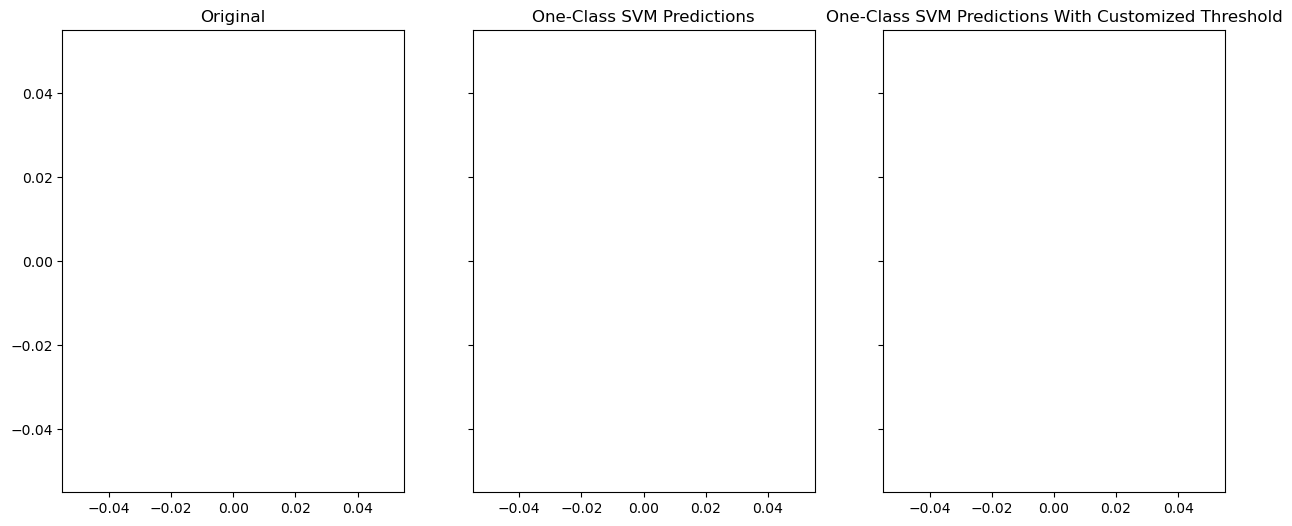

In [250]:
# ONE CLASS SVM

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dataset = df3.copy()
cols = list(dataset.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Is Account Takeover')) # Remove column from list
dataset = dataset[cols+['Is Account Takeover']] # Add it to the end

# split data into X and y
X = dataset.iloc[:,0:397]
Y = dataset.iloc[:,397]

# Convert the data from numpy array to a pandas dataframe
# df = pd.DataFrame({'feature1': X[:, 0:8], 'feature2': X[:, 8], 'target': Y})
# Check the target distribution
Y.value_counts(normalize = True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction, zero_division=0))


# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction, zero_division=0))


# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Is Account Takeover', 'Blacklisted'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['Is Account Takeover'], df_test['Blacklisted'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

cm = confusion_matrix(y_test, prediction) # Create CM From Data
print(cm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 398 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(392)
memory usage: 80.6 KB
Outlier Method: Isolation Forest
Number of anomalous values 11
Number of non anomalous values  189
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 39
Number of non anomalous values  161
Total Number of Values: 200


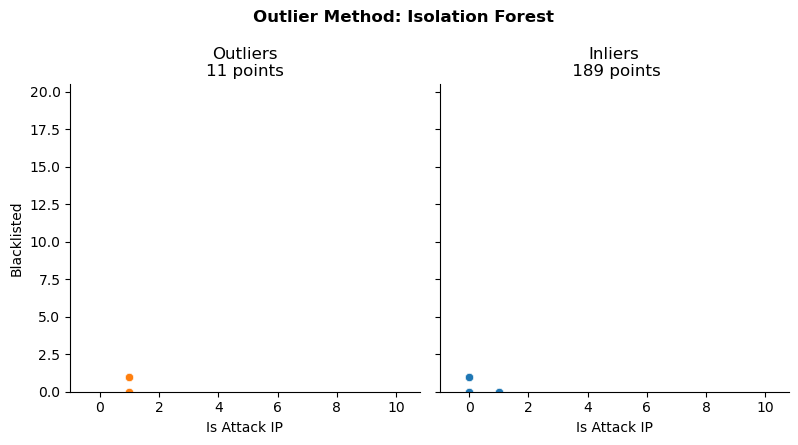

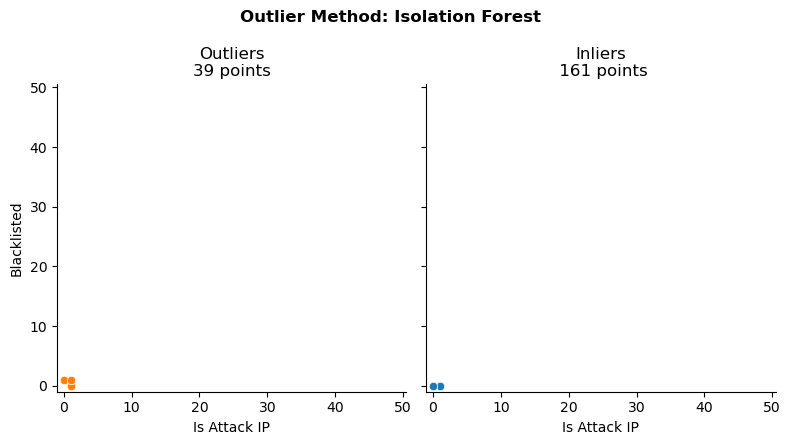

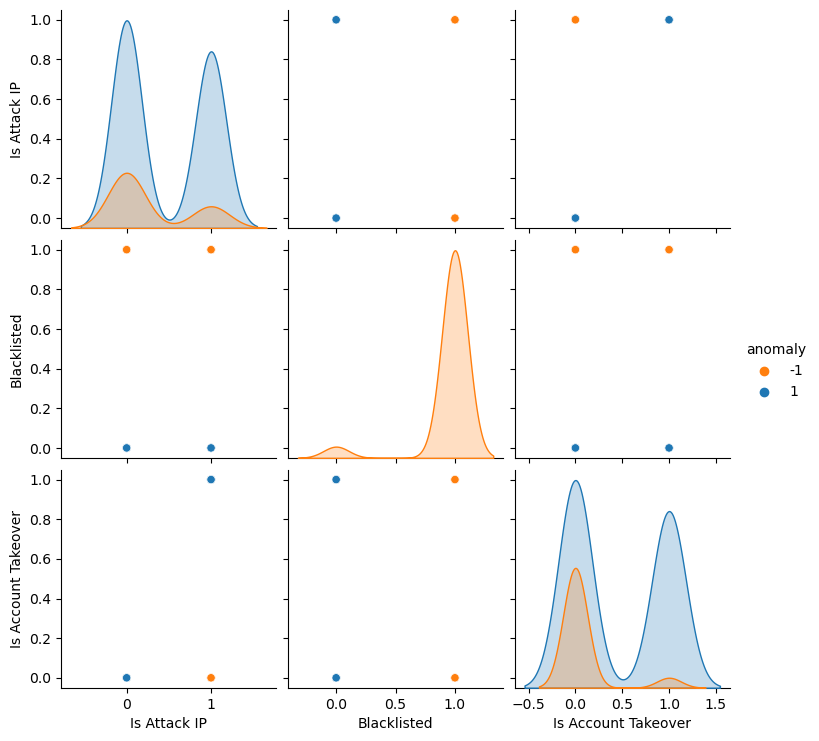

In [251]:
# ISOLATION FOREST https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = df3.copy()
df.info()
anomaly_inputs = ['Is Attack IP', 'Blacklisted', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Is Attack IP', 'Blacklisted','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Is Attack IP', 'Blacklisted', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 398 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(392)
memory usage: 80.6 KB
Outlier Method: Isolation Forest
Number of anomalous values 20
Number of non anomalous values  180
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 60
Number of non anomalous values  140
Total Number of Values: 200


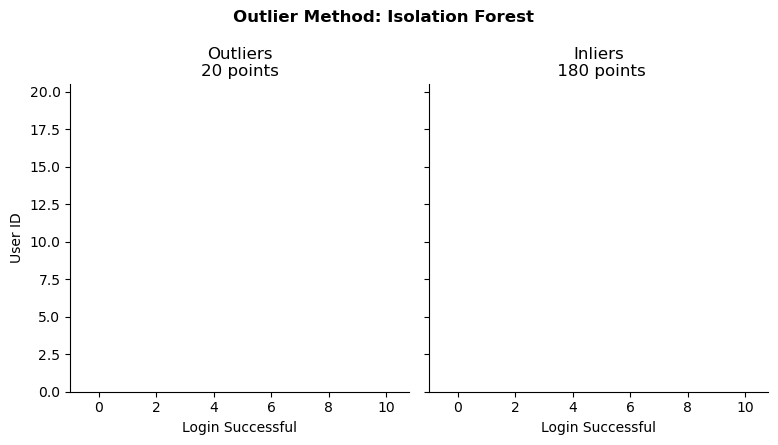

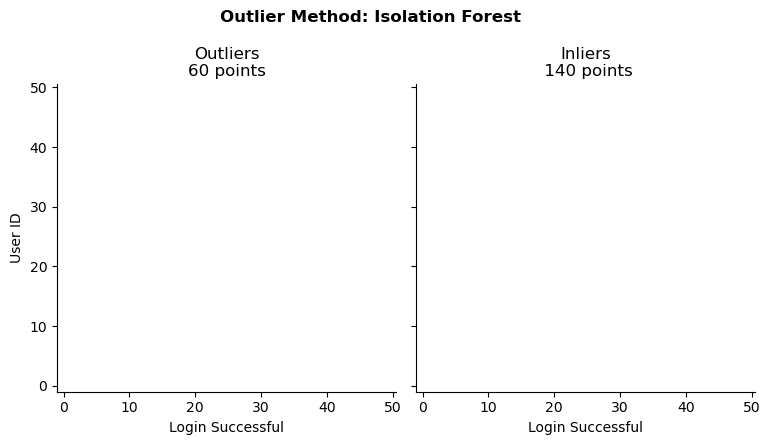

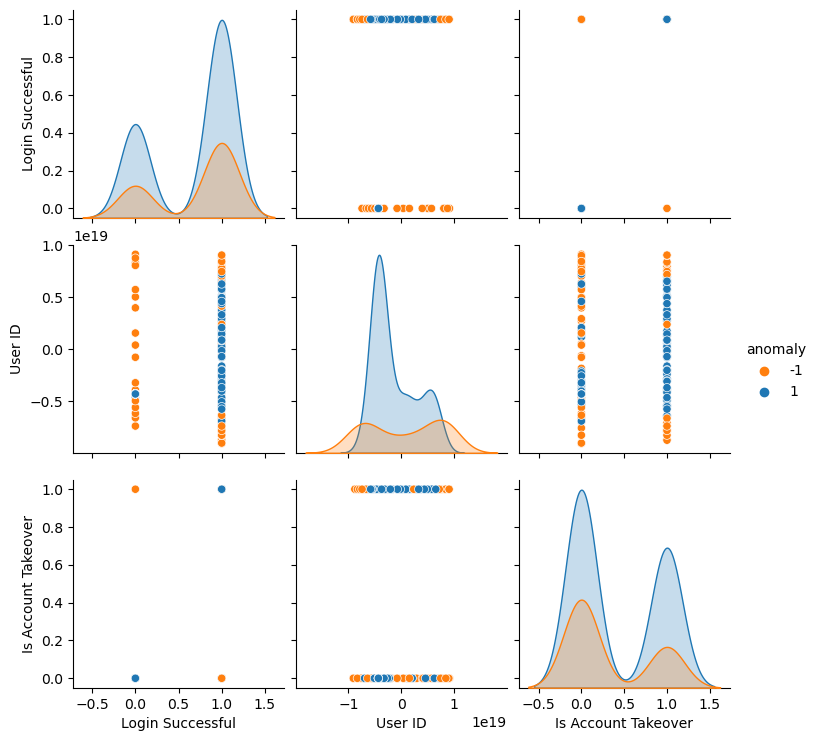

In [252]:
df = df3.copy()
df.info()
anomaly_inputs = ['Login Successful', 'User ID', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'User ID','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'User ID', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 398 entries, User ID to brw_O
dtypes: bool(4), int64(2), uint8(392)
memory usage: 80.6 KB
Outlier Method: Isolation Forest
Number of anomalous values 9
Number of non anomalous values  191
Total Number of Values: 200


/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 9
Number of non anomalous values  191
Total Number of Values: 200


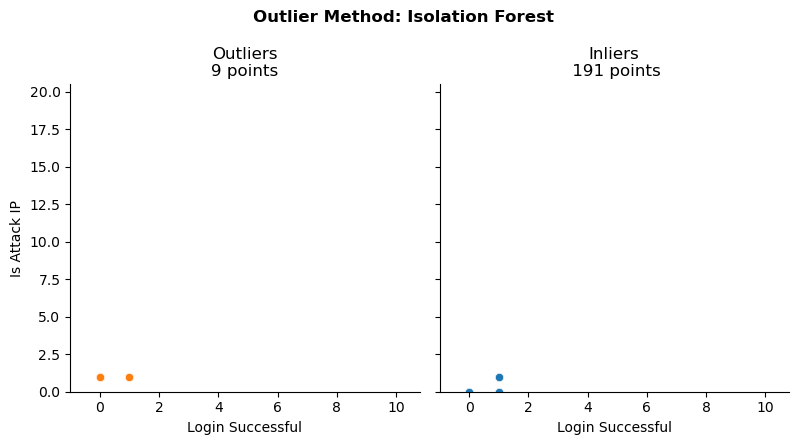

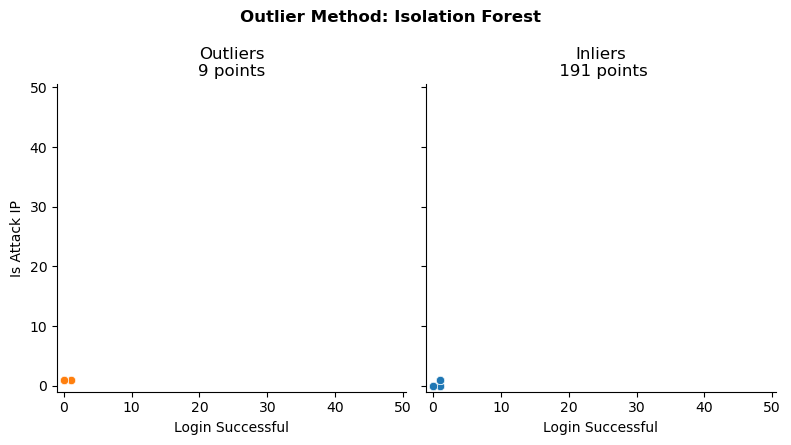

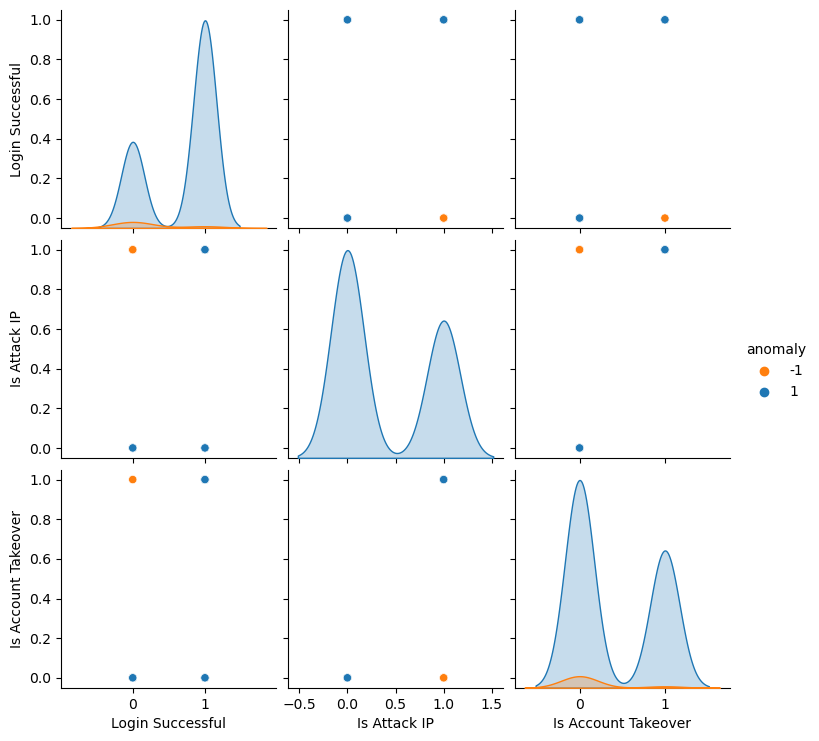

In [253]:
df = df3.copy()
df.info()
anomaly_inputs = ['Login Successful', 'Is Attack IP', 'Is Account Takeover']
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
df.loc[:, ['Login Successful', 'Is Attack IP','anomaly_scores','anomaly', 'Is Account Takeover'] ]

outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-1, 10.8], [0, 20.5]);

# Increasing contamination value
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'Login Successful', 'Is Attack IP', [-1, 50.5], [-1, 50.5]);
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

(77, 398) (123, 398)
(200, 397)
(200,)
Isolation Forest: 91
Accuracy Score :
0.545
Classification Report :
              precision    recall  f1-score   support

       False       0.59      0.86      0.70       123
        True       0.15      0.04      0.06        77

    accuracy                           0.55       200
   macro avg       0.37      0.45      0.38       200
weighted avg       0.42      0.55      0.45       200

Local Outlier Factor: 81
Accuracy Score :
0.595
Classification Report :
              precision    recall  f1-score   support

       False       0.62      0.90      0.73       123
        True       0.40      0.10      0.16        77

    accuracy                           0.59       200
   macro avg       0.51      0.50      0.45       200
weighted avg       0.53      0.59      0.51       200



/Users/marta.grzesiak@schibsted.com/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Support Vector Machine: 119
Accuracy Score :
0.405
Classification Report :
              precision    recall  f1-score   support

       False       0.70      0.06      0.11       123
        True       0.39      0.96      0.55        77

    accuracy                           0.41       200
   macro avg       0.54      0.51      0.33       200
weighted avg       0.58      0.41      0.28       200



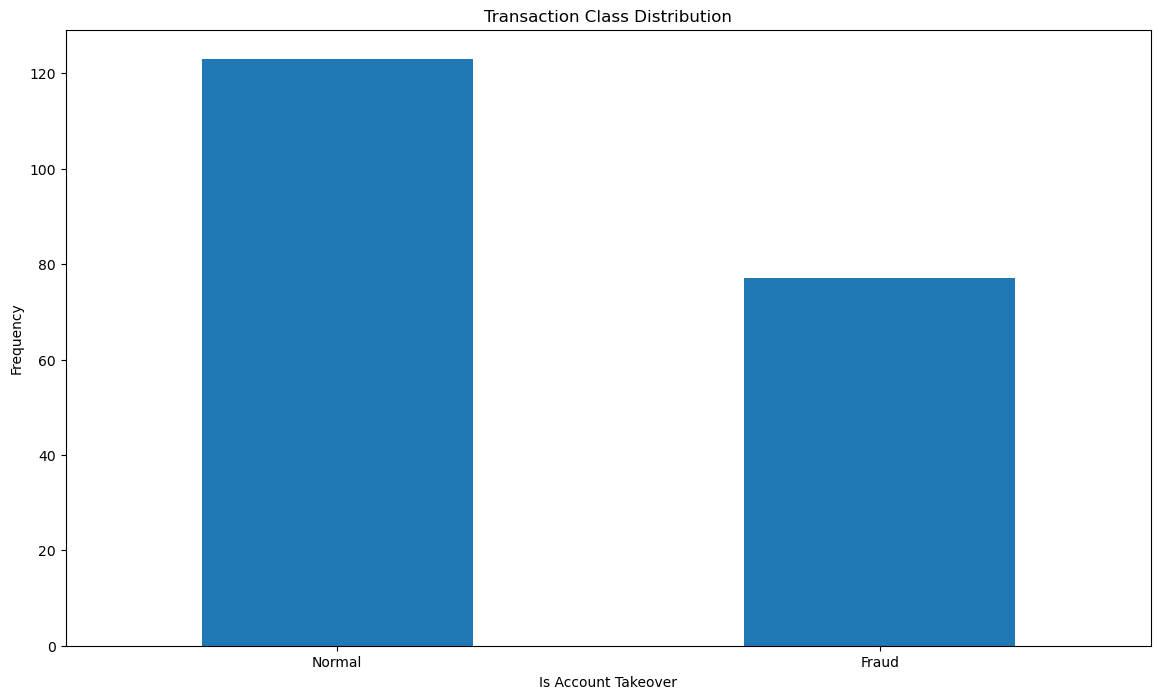

In [254]:
# iForest, Local Outlier Factor, Support Vector Machine
#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]
df = df3.copy()
count_classes = pd.value_counts(df['Is Account Takeover'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Is Account Takeover")
plt.ylabel("Frequency")

fraud = df[df['Is Account Takeover']==1]
normal = df[df['Is Account Takeover']==0]
print(fraud.shape,normal.shape)

outlier_fraction = len(fraud)/float(len(normal))

#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Is Account Takeover"]]
# Store the variable we are predicting 
target = "Is Account Takeover"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(contamination=0.1).fit(X)
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf = IsolationForest(contamination=0.1).fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))